In [ ]:
!pip install fuzzywuzzy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datascienceandAI_course/_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv')

In [ ]:
df

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,102.61,PayPal,4,2024-11-15,9.0,0,Northeast,NaN,Desktop
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,women,Sandals,Reebok,200.66,3,20,481.58,Credit Card,3,2025-01-10,4.0,0,Northeast,45-54,Desktop
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,209.39,Credit Card,1,2025-01-09,8.0,0,Midwest,25-34,App
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booti3s,The Peanutshell,172.17,1,15,146.34,Cash on Delivery,4,2024-10-23,4.0,0,Northeast,25-34,Desktop


In [ ]:
df.shape

(25000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000 non-null  int64  
 16  regi

In [ ]:
df.describe()

,price,quantity,discount_percent,final_price,review_rating,delivery_days,is_returned
count,24750.000000,25000.000000,25000.000000,25000.000000,25000.000000,24750.000000,25000.000000
mean,155.395911,1.999400,12.527400,271.491812,3.698040,4.994869,0.098440
std,84.443830,0.814755,8.543663,196.188476,1.095641,2.578238,0.297915
min,10.020000,1.000000,0.000000,7.530000,1.000000,1.000000,0.000000
25%,82.010000,1.000000,5.000000,116.247500,3.000000,3.000000,0.000000
50%,154.805000,2.000000,15.000000,219.410000,4.000000,5.000000,0.000000
75%,229.007500,3.000000,20.000000,398.565000,4.000000,7.000000,0.000000
max,299.980000,3.000000,25.000000,899.790000,5.000000,9.000000,1.000000


**Detailed Analysis of Each Column**<br>
**1. price**
Range: 10.02 – 299.98
Mean: ~155.40
Std. Dev.: ~84.44 (high → indicates wide variation in product prices).
Percentiles:
25% = 82.01 → a quarter of items cost less than ~82
50% (median) = 154.81 → half the items cost less than ~155
75% = 229.01 → 25% of items cost more than ~229
Interpretation:
Prices are fairly evenly spread, with a large standard deviation showing product variety. The distribution is right-skewed (higher-priced items pull up the mean above the median).<br>
**2. quantity**
Range: 1 – 3
Mean: ~1.999 → close to 2
Std. Dev.: 0.815 (not much variation since values are bounded between 1 and 3).
Percentiles:
25% = 1
50% = 2
75% = 3
Interpretation:
Customers usually order 1–3 units, with most buying 2 items. The distribution looks uniformly spread across 1, 2, and 3.<br>
**3. discount_percent**
Range: 0 – 25%
Mean: ~12.53%
Std. Dev.: ~8.54
Percentiles:
25% = 5%
50% = 15%
75% = 20%
Interpretation:
Discounts are common, mostly in the range 5–20%, with the median at 15%. Very few items have no discount (min = 0).<br>
**4. final_price**
Range: 7.53 – 899.79
Mean: ~271.49
Std. Dev.: ~196.19 (large spread).
Percentiles:
25% = 116.25
50% = 219.41
75% = 398.57
Interpretation:
Final prices vary a lot depending on both product price and quantity ordered. The distribution is skewed, with some very high-value orders pulling up the average.<br>
**5. review_rating**
Range: 1 – 5
Mean: ~3.70 (slightly positive)
Std. Dev.: ~1.10
Percentiles:
25% = 3
50% = 4
75% = 4
Interpretation:
Most ratings are 3 or 4, with relatively few 1-star or 5-star reviews. Customer satisfaction is moderately high.<br>
**6. delivery_days**
Range: 1 – 9
Mean: ~5 days
Std. Dev.: ~2.58
Percentiles:
25% = 3 days
50% = 5 days
75% = 7 days
Interpretation:
Delivery takes 3–7 days for most orders, with an average of ~5 days. Few deliveries happen in just 1 day, and max is 9 days. This suggests a standard delivery window rather than express shipping.<br>
**7. is_returned**
Range: 0 or 1 (binary)
Mean: ~0.098 → ~9.8% return rate.
Std. Dev.: ~0.298 (typical for a binary variable).
Percentiles:
25% = 0
50% = 0
75% = 0
Max = 1
Interpretation:
About 1 in 10 orders are returned, which is fairly normal for e-commerce. Most transactions (90%+) are not returned.

In [ ]:
df.describe(include=['O'])

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,payment_method,order_date,region,customer_age_group,device_type
count,25000,25000,25000,25000,25000,25000,23750,23750,25000,23750,23750,23750
unique,25000,25000,25000,100,8,32,17,4,365,4,5,3
top,#ESF9EL1PBJ19OS,437139608515,TKVZYTQKPQ,Nike Sneakers,Kids,Shorts,Nike,Credit Card,2024-09-24,Midwest,55+,App
freq,1,1,1,292,5726,1285,2448,5975,96,5979,4849,7974


**Detailed Analysis of Categorical Columns**  

**1\. order_id**  
Unique values: 25,000 (same as count).  
Top value: #ESF9EL1PBJ19OS (appears only once).  
**Interpretation:** Each order has a unique ID, confirming it’s a primary identifier.  

**2\. customer_id**  
Unique values: 25,000 (same as count).  
Top value: 437139608515 (appears only once).  
**Interpretation:** Each customer ID is unique. This dataset seems to simulate one transaction per customer, or at least IDs are not repeated here.  

**3\. product_id**  
Unique values: 25,000 (same as count).  
Top value: TKVZYTQKPQ (appears once).  
**Interpretation:** Each product ID in this dataset is unique too. Possibly every row represents a distinct product-transaction pair.  

**4\. product_name**  
Unique values: 100  
Top value: "Nike Sneakers" (appears 292 times).  
**Interpretation:** Even though product IDs are unique, product names are repeated (multiple orders for the same product). "Nike Sneakers" is the most frequently ordered item.  

**5\. main_category**  
Unique values: 8  
Top category: "Kids" (5726 times).  
**Interpretation:** Products fall into 8 major categories. The "Kids" category dominates, making up ~22.9% of all orders.  

**6\. sub_category**  
Unique values: 32  
Top value: "Shorts" (1285 times).  
**Interpretation:** Products are more granularly divided into 32 subcategories. "Shorts" is the most common subcategory (~5.1% of orders).  

**7\. brand**  
Unique values: 17  
Top brand: "Nike" (2448 times).  
**Interpretation:** "Nike" is the leading brand (~10.3% of orders). Brand information is missing for some rows (count = 23,750 < 25,000 → about 5% missing).  

**8\. payment_method**  
Unique values: 4  
Top method: "Credit Card" (5975 times).  
**Interpretation:** Customers pay using 4 different methods. "Credit Card" is the most popular (~25% of orders). About 5% values are missing.  

**9\. order_date**  
Unique values: 365 (i.e., one year of data).  
Top date: "2024-09-24" (96 orders).  
**Interpretation:** Data spans an entire year. Some dates (like "2024-09-24") had higher activity (96 orders).  

**10\. region**  
Unique values: 4  
Top region: "Midwest" (5979 orders).  
**Interpretation:** The dataset covers 4 regions. "Midwest" has the highest number of orders (~25.2%). About 5% missing.  

**11\. customer_age_group**  
Unique values: 5 (e.g., 18–24, 25–34, …, 55+).  
Top group: "55+" (4849 customers).  
**Interpretation:** The "55+" age group is the largest (~20.4% of customers). Again, ~5% missing values.  

**12\. device_type**  
Unique values: 3 (e.g., App, Web, Tablet).  
Top device: "App" (7974 customers).  
**Interpretation:** Most purchases happen through the App (~33.6%), followed by other platforms. About 5% missing values here too.  


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            25000 non-null  object        
 1   customer_id         25000 non-null  object        
 2   product_id          25000 non-null  object        
 3   product_name        25000 non-null  object        
 4   main_category       25000 non-null  object        
 5   sub_category        25000 non-null  object        
 6   brand               23750 non-null  object        
 7   price               24750 non-null  float64       
 8   quantity            25000 non-null  int64         
 9   discount_percent    25000 non-null  int64         
 10  final_price         25000 non-null  float64       
 11  payment_method      23750 non-null  object        
 12  review_rating       25000 non-null  int64         
 13  order_date          25000 non-null  datetime64

In [ ]:
df.head(10)

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile
5,#FW6RJW7J2CKO7L,0A4782087A93,CSS5YL285Y,Puma Shoes,Men,Shoes,Puma,283.24,2,5,538.16,Gift Card,3,2025-03-22,5.0,0,West,55+,App
6,#ERYDKBGN6SJ9TK,1743A7859A02,PJAH83UXW7,Levi's Jeans,Men,Jeans,Levi's,208.15,1,10,187.34,Cash on Delivery,4,2025-01-22,1.0,0,South,55+,Mobile
7,#QOVOATLRIG0ZM2,974672411554,CMAV37VBNR,Gap Shirts,Kids,Shirts,Gap,100.40,2,25,150.60,Gift Card,5,2024-10-14,4.0,0,Midwest,NaN,NaN
8,#UTRQMENIVCWK7G,275180868989,Z7UD12K6M9,Adidas Watches,Men,Watches,NaN,234.79,2,5,446.10,PayPal,4,2025-03-27,8.0,0,Northeast,25-34,Desktop
9,#OKQTHH2LY9WEEB,203512125403,PKDFJH2MEK,Michael Kors Jewelry,Women,Jewelry,Michael Kors,288.74,1,20,230.99,Gift Card,5,2025-06-03,5.0,0,Midwest,18-24,Mobile


In [ ]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values/len(df))*100

print("*-------------------Missing Values-----------------*\n")
print(missing_values)
print("\n*-------------------Missing Values Perecentage-----------------*\n")
print(missing_values_percentage)

*-------------------Missing Values-----------------*

order_id                 0
customer_id              0
product_id               0
product_name             0
main_category            0
sub_category             0
brand                 1250
price                  250
quantity                 0
discount_percent         0
final_price              0
payment_method        1250
review_rating            0
order_date               0
delivery_days          250
is_returned              0
region                1250
customer_age_group    1250
device_type           1250
dtype: int64

*-------------------Missing Values Perecentage-----------------*

order_id              0.0
customer_id           0.0
product_id            0.0
product_name          0.0
main_category         0.0
sub_category          0.0
brand                 5.0
price                 1.0
quantity              0.0
discount_percent      0.0
final_price           0.0
payment_method        5.0
review_rating         0.0
order_date     

**Missing Values Summary:**

**brand (5%)** – Product brand information missing for some entries.

**price (1%)** – Few records have no price value.

**payment_method (5%)** – Mode of payment not recorded in some orders.

**delivery_days (1%)** – Delivery duration missing in limited cases.

**region (5%)** – Geographic region not specified for some customers.

**customer_age_group (5%)** – Age group of customers not available in few records.

**device_type (5%)** – Device used for placing orders missing in some entries.

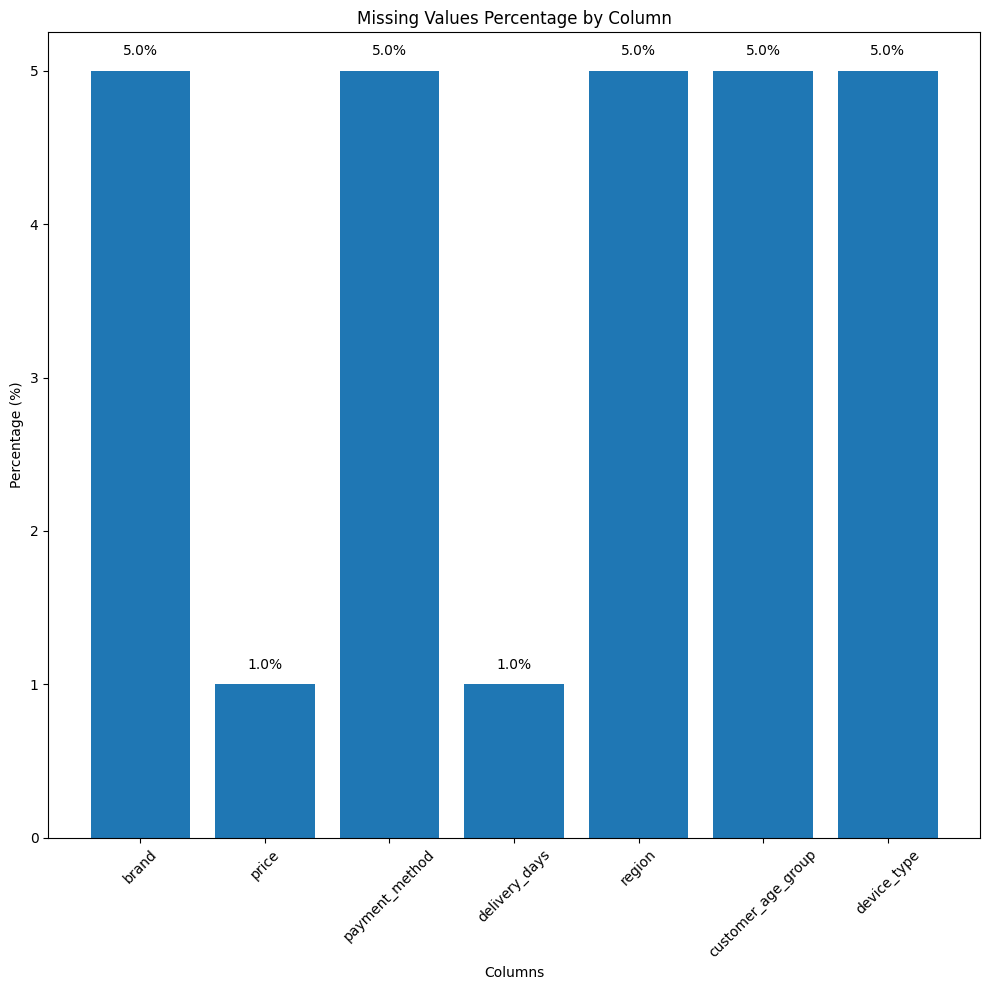

In [ ]:
import matplotlib.pyplot as plt
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

plt.figure(figsize=(10, 10))
plt.bar(missing_values_percentage.index, missing_values_percentage.values)

# percentage labels on top of bars
for i, v in enumerate(missing_values_percentage.values):
    plt.text(i, v+0.1 , f"{v:.1f}%", ha='center', fontsize=10)

plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['brand'].value_counts()

,count
brand,
Nike,2448
Adidas,2378
Carter's,2369
Michael Kors,1219
Gap,1219
Hudson Baby,1209
Huggies,1208
Zara,1200
Levi's,1189


In [ ]:
df['payment_method'].value_counts()

,count
payment_method,
Credit Card,5975
PayPal,5959
Gift Card,5940
Cash on Delivery,5876


In [ ]:
df['region'].value_counts()

,count
region,
Midwest,5979
West,5962
South,5941
Northeast,5868


In [ ]:
df['customer_age_group'].value_counts()

,count
customer_age_group,
55+,4849
25-34,4785
45-54,4754
18-24,4709
35-44,4653


In [ ]:
df['device_type'].value_counts()

,count
device_type,
App,7974
Mobile,7934
Desktop,7842


In [ ]:
df.loc[df['brand'].isnull()]

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
8,#UTRQMENIVCWK7G,275180868989,Z7UD12K6M9,Adidas Watches,Men,Watches,NaN,234.79,2,5,446.10,PayPal,4,2025-03-27,8.0,0,Northeast,25-34,Desktop
27,#P88BNFUAEADA43,36041A770990,5E11KPK5RR,Huggies Booties,Baby,Booties,NaN,104.53,3,5,297.91,Credit Card,3,2024-11-24,4.0,0,West,55+,Mobile
57,#2009GX7HTOCY7T,185852415462,IQ4C5GBK9G,OshKosh Shirts,Kids,Shirts,NaN,194.18,2,15,330.11,PayPal,5,2025-02-08,3.0,0,South,35-44,App
59,#69FSZZWESF7K0H,AA0558A95453,AJ599NZ8OI,Gap Shirts,Kids,Shirts,NaN,196.55,1,20,157.24,Gift Card,5,2024-12-26,5.0,0,South,55+,App
114,#3EL2XCGWRC6JO1,878821681980,V33WT4GZFE,OshKosh Caps,Kids,Caps,NaN,261.00,2,25,391.50,Credit Card,5,2024-10-02,8.0,0,Midwest,55+,App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24889,#3ASLGLSICY026K,62850679118,QH4U6T597R,Zara Handbags,Women,Handbags,NaN,200.69,3,5,571.97,Credit Card,5,2025-01-06,3.0,1,NaN,35-44,Mobile
24908,#AFDLTGKBUL4I1V,649496A93294,VB4WQG2FGQ,Coach Sandals,Women,Sandals,NaN,65.00,2,15,110.50,Cash on Delivery,4,2025-06-25,9.0,0,West,18-24,App
24913,#DJF9IBA9S5HFE2,823572822548,932895687T,Hudson Baby Booties,Baby,Booties,NaN,195.96,1,10,176.36,PayPal,2,2024-09-27,5.0,0,Midwest,55+,Desktop
24916,#NHT5VTW0DPBP61,4125955460A2,JXGHOSTVRX,Adidas T-Shirts,Men,T-Shirts,NaN,105.29,1,25,78.97,NaN,3,2025-01-03,9.0,0,Midwest,45-54,App


In [ ]:
# categorical columns (object or category dtype)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# categorical columns that have missing values
categorical_missing_cols = [col for col in categorical_cols if df[col].isnull().sum() > 0]

# Loop through them and fill missing values with 'Unknown'
for col in categorical_missing_cols:
    df[col] = df[col].fillna('Unknown')
    print(f"Filled missing values in '{col}' with 'Unknown'")

Filled missing values in 'brand' with 'Unknown'
Filled missing values in 'payment_method' with 'Unknown'
Filled missing values in 'region' with 'Unknown'
Filled missing values in 'customer_age_group' with 'Unknown'
Filled missing values in 'device_type' with 'Unknown'


**Handling Missing Values (Categorical):**

Identified categorical columns with missing values and replaced them with the label "Unknown" to retain records and avoid dropping data.

In [ ]:
df['price'].value_counts()

,count
price,
106.59,7
289.11,6
69.75,6
145.85,6
221.67,6
...,...
219.00,1
187.01,1
74.19,1


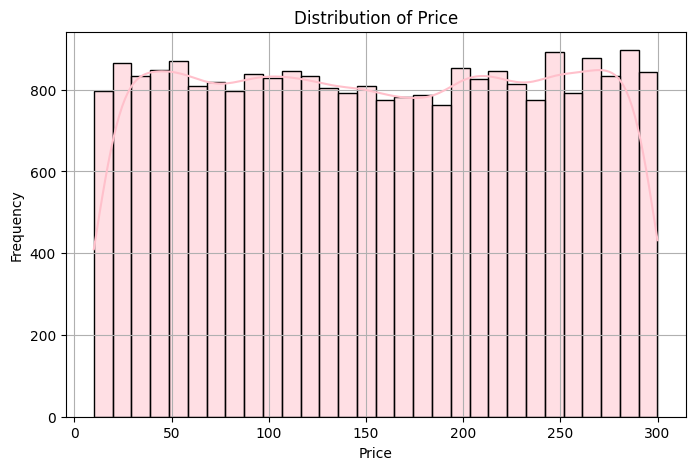

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Histogram with KDE
sns.histplot(df['price'], kde=True, bins=30, color='pink')

plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

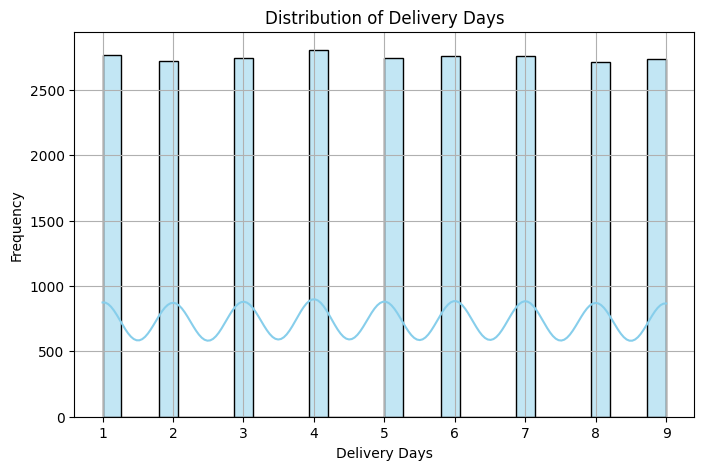

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Histogram with KDE
sns.histplot(df['delivery_days'], kde=True, bins=30, color='skyblue')

plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Fill missing values with mean for 'price' and 'delivery_days'
df['price']=df['price'].fillna(df['price'].mean())
df['delivery_days']=df['delivery_days'].fillna(df['delivery_days'].mean())
df['delivery_days'].mean()
print("Missing values in 'price' and 'delivery_days' filled with mean.")


Missing values in 'price' and 'delivery_days' filled with mean.


**Handling Missing Values (Numerical):**

Filled missing values in price and delivery_days columns with their respective mean values to maintain consistency in numerical data.

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,0
price,0
quantity,0
discount_percent,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['product_name'].value_counts()

,count
product_name,
Nike Sneakers,292
Gap Sweaters,283
Zara Tops,278
Carter's Caps,278
Michael Kors Jewelry,276
...,...
OshKosh Sneakers,228
Michael Kors Sandals,227
H&M Dresses,226


In [ ]:
import numpy as np

# expected final price
expected_final_price = (df['price'] * (1 - df['discount_percent'] / 100)).round(2)
actual_final_price = df['final_price'].round(2)

# Checking consistency using np.isclose
price_formula_match = np.isclose(actual_final_price, expected_final_price)

# Counting inconsistent rows
inconsistent_count = (~price_formula_match).sum()
total_rows = len(df)

print(f"Inconsistent rows: {inconsistent_count} / {total_rows}")

Inconsistent rows: 16782 / 25000


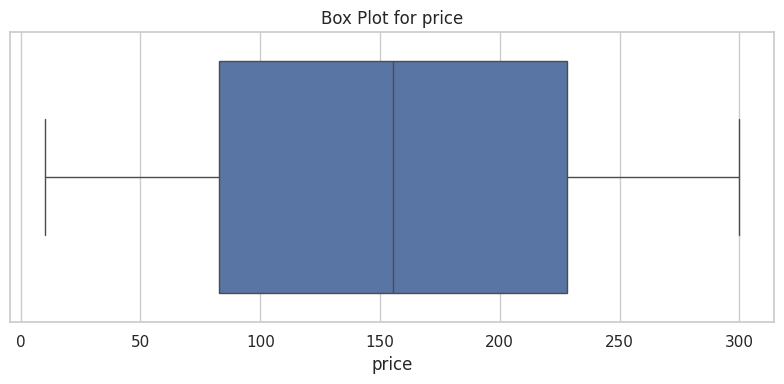

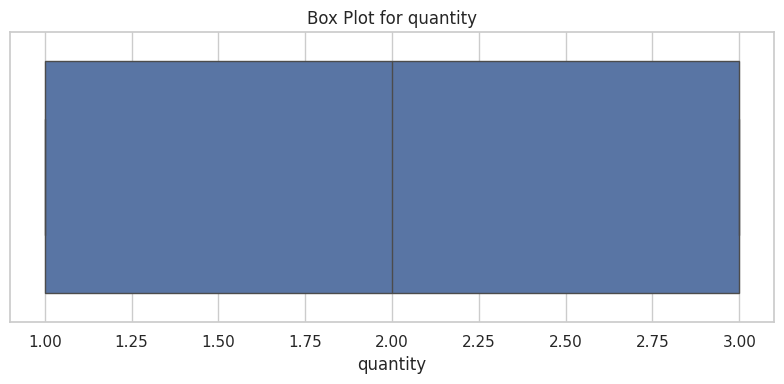

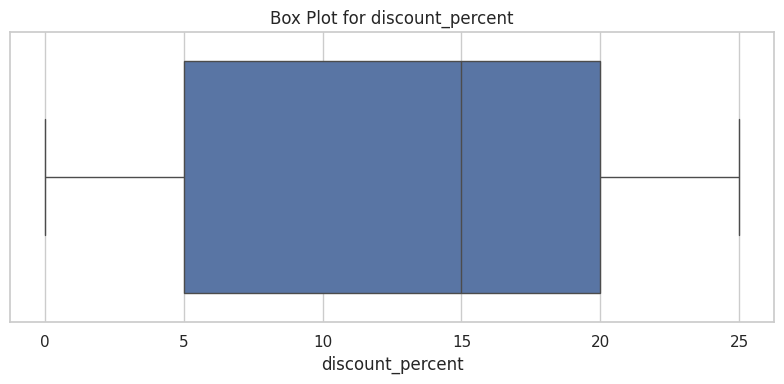

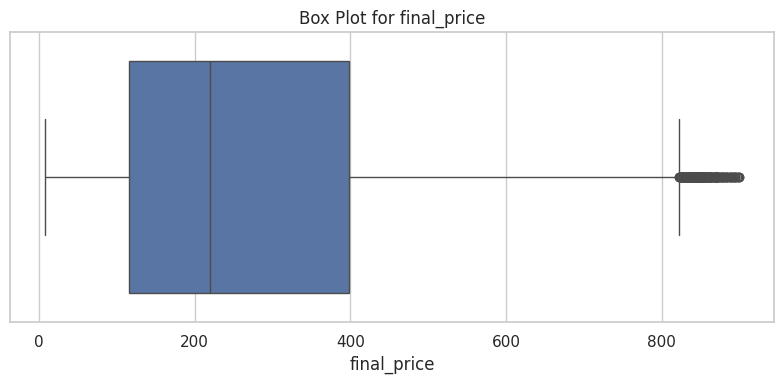

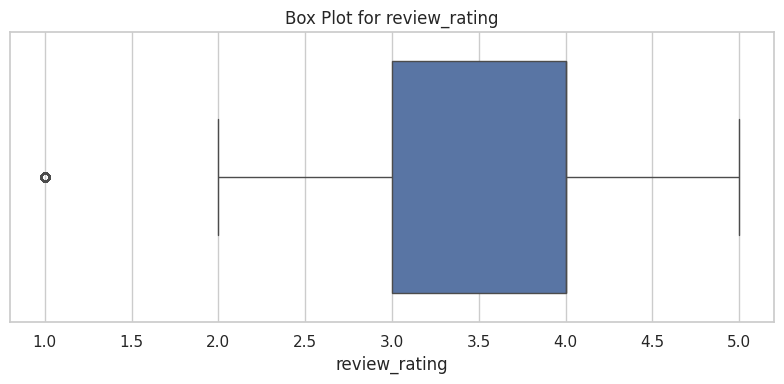

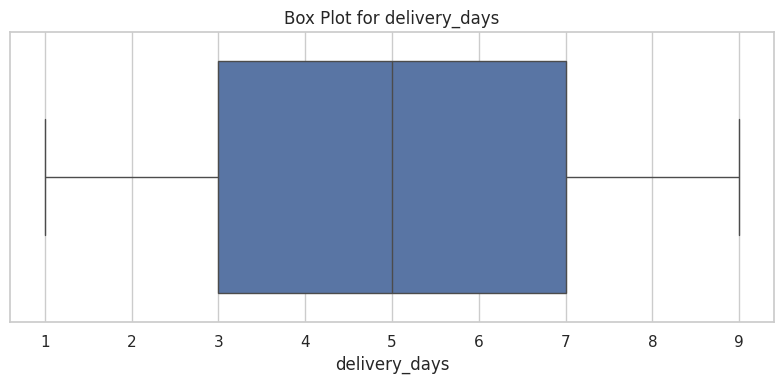

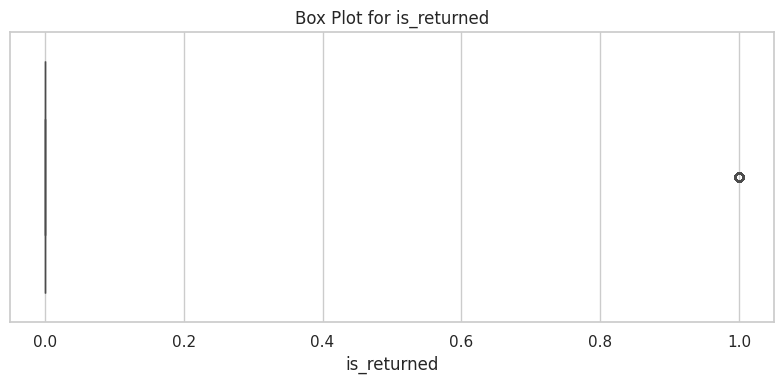

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
sns.set(style="whitegrid")

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**Data Consistency & Outlier Detection:**

First, the final_price column was validated by recalculating the expected price using the formula:

**final_price** = price * (1 - discount_percent/100)

Initially, **16,782** rows were found inconsistent, indicating that the stored final_price values did not match the expected calculation.
This inconsistency caused the boxplot of final_price to display extreme values (outliers).

After correcting the calculation of final_price based on the discount formula, the inconsistencies were resolved.
A fresh outlier check using boxplots for all numeric columns showed no significant outliers, confirming that the anomaly was solely due to incorrect final_price values.

In [ ]:

order_month = df['order_date'].dt.month
order_weekday = df['order_date'].dt.day_name()
order_year = df['order_date'].dt.year

print(order_month.head())
print(order_weekday.head())
print(order_year.head())


0     9
1     6
2     1
3     8
4    11
Name: order_date, dtype: int32
0      Tuesday
1    Wednesday
2    Wednesday
3    Wednesday
4      Tuesday
Name: order_date, dtype: object
0    2024
1    2025
2    2025
3    2024
4    2024
Name: order_date, dtype: int32


In [ ]:
df['final_price'] = (df['price'] * (1 - df['discount_percent'] / 100)).round(2)

In [ ]:
df['discount_amount'] = df['price'] * df['discount_percent'] / 100

In [ ]:
df['unit_price'] = df['final_price'] / df['quantity']

In [ ]:
df['delivery_speed'] = df['delivery_days'].apply(lambda x: 'fast' if x <= 4 else 'slow')

A new categorical feature **delivery_speed** was created from the delivery_days column. Orders delivered in 4 days or less were labeled as "fast", while those taking more than 4 days were labeled as "slow".

In [ ]:
customer_agg = df.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    total_orders=('order_id', 'nunique'),
    average_rating=('review_rating', 'mean'),
    return_rate=('is_returned', 'mean')
).reset_index()

print(customer_agg.head(10))


    customer_id  total_spend  total_orders  average_rating  return_rate
0  0000A5486A60       188.66             1             2.0          0.0
1  000128A482A9       171.55             1             3.0          0.0
2  0006310A3377       203.02             1             5.0          0.0
3  00069A393862       270.91             1             3.0          0.0
4  00070A643221        86.88             1             4.0          0.0
5  0007764988A2       217.19             1             4.0          0.0
6  000782A74491        53.24             1             1.0          0.0
7  00088A1A0105       118.12             1             4.0          0.0
8  000A16453889       147.77             1             5.0          0.0
9  000A20527864        92.41             1             4.0          0.0


The aggregated dataset groups records by customer_id, which is unique for each customer, and summarizes their total spend, number of orders, average rating, and return rate.

In [ ]:
df['final_price'] = (df['price'] * (1 - df['discount_percent'] / 100)).round(2)

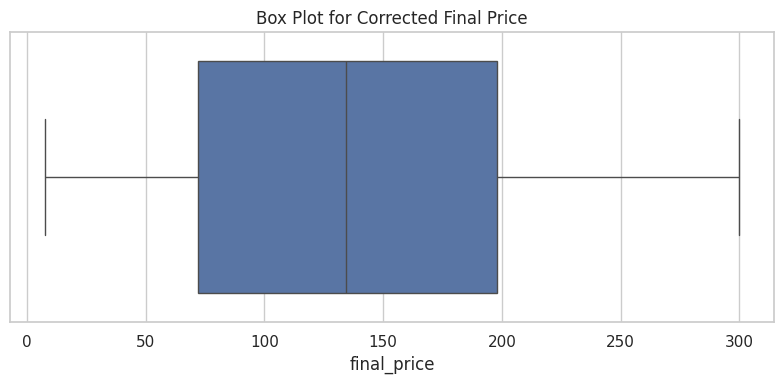

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['final_price'])
plt.title('Box Plot for Corrected Final Price')
plt.xlabel('final_price')
plt.tight_layout()
plt.show()

No outliers detected after applying correct formula.


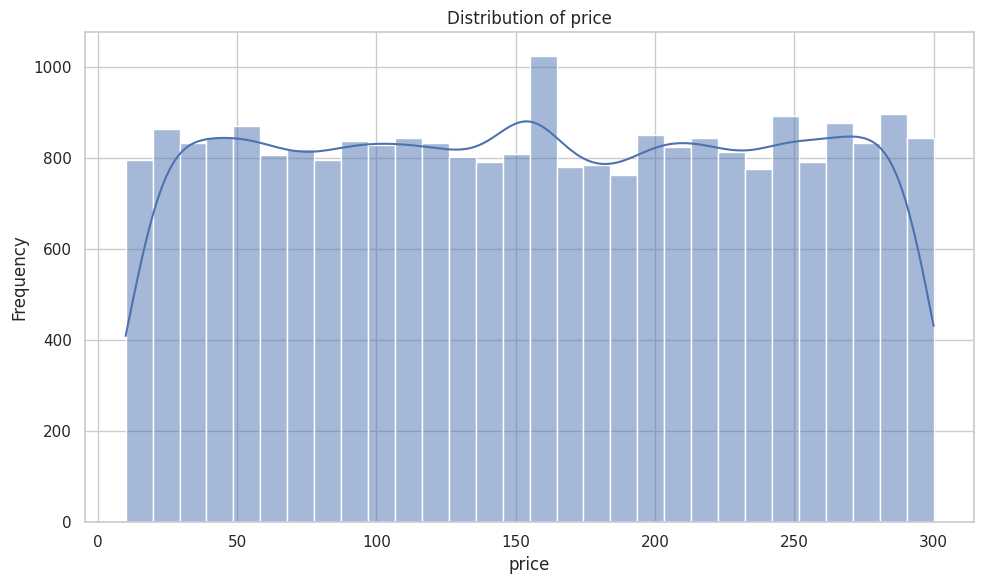

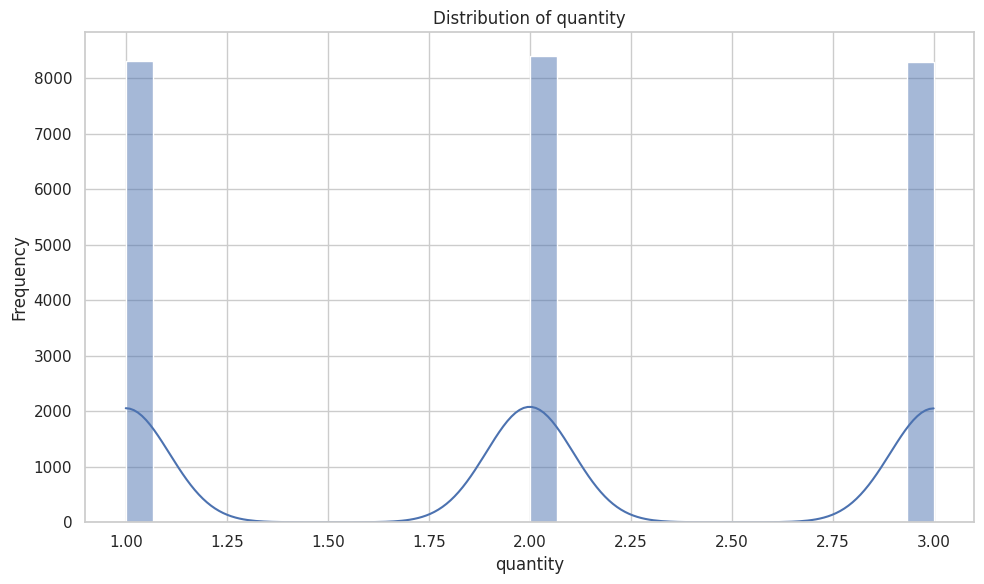

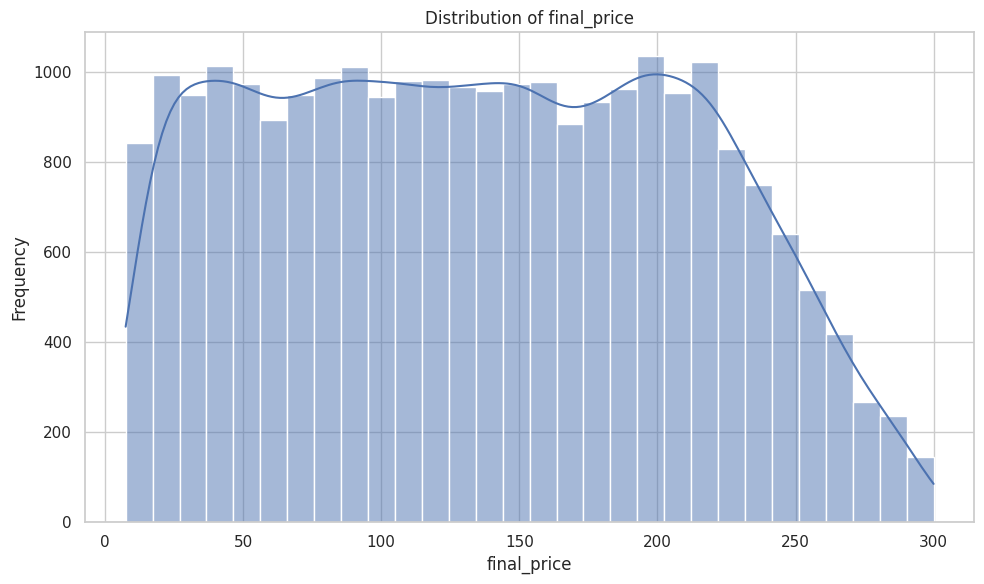

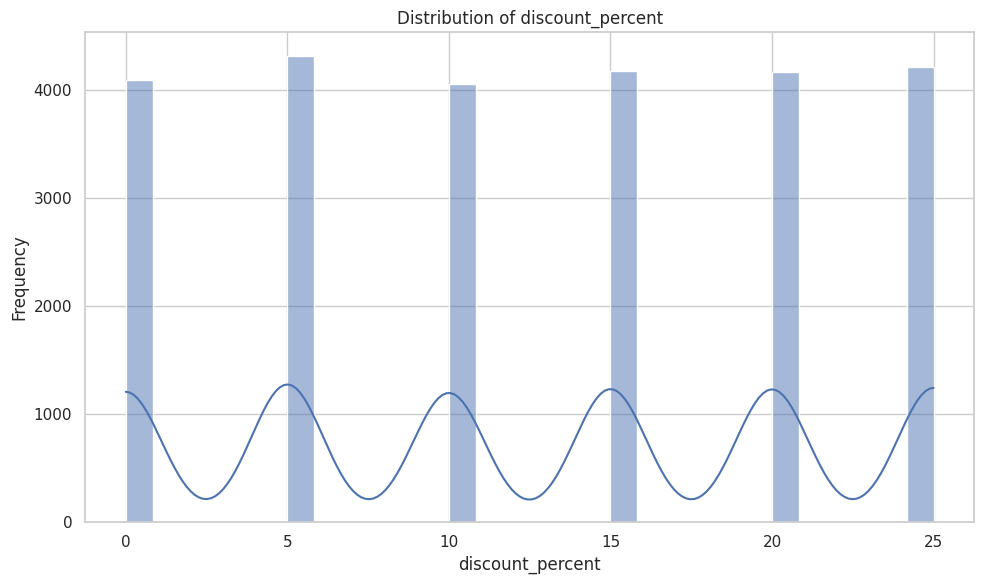

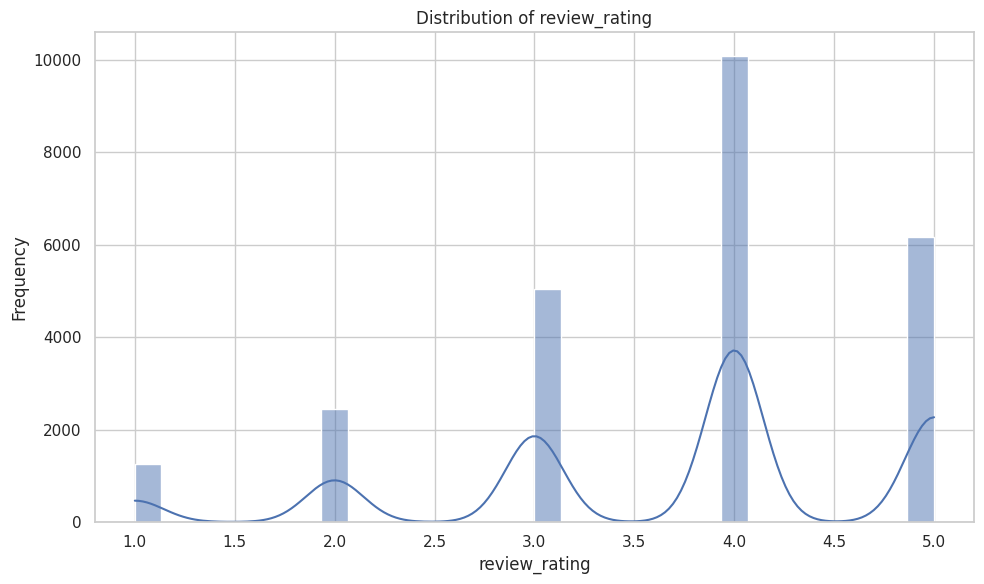

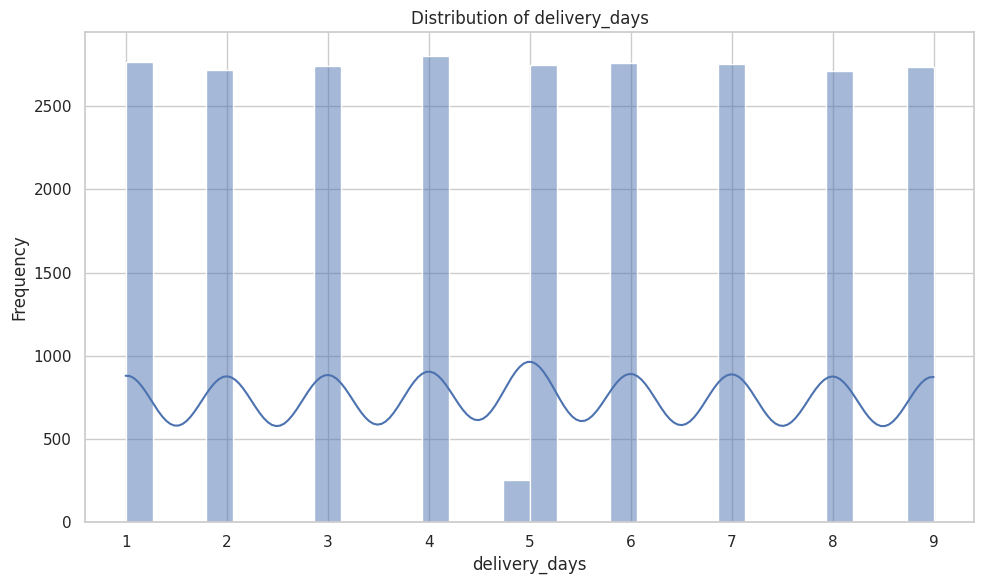

In [ ]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
numeric_cols = ['price','quantity', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

The distribution analysis shows that final_price is right-skewed, indicating the presence of higher-value purchases, while review_rating is left-skewed, reflecting a tendency toward higher ratings. All other numeric features (price, quantity, discount_percent, delivery_days) were approximately evenly distributed.

In [ ]:
df['main_category'] = df['main_category'].str.lower()

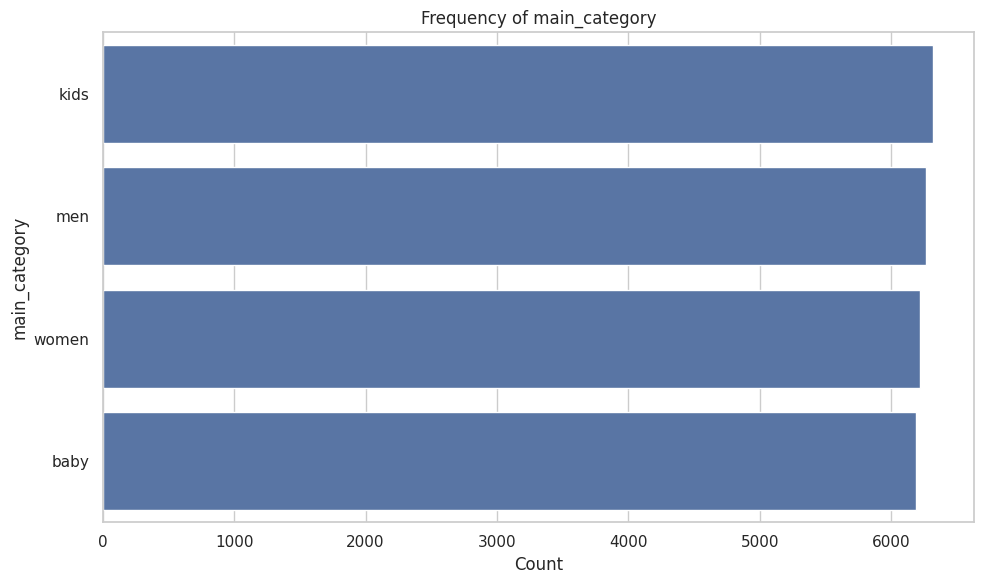

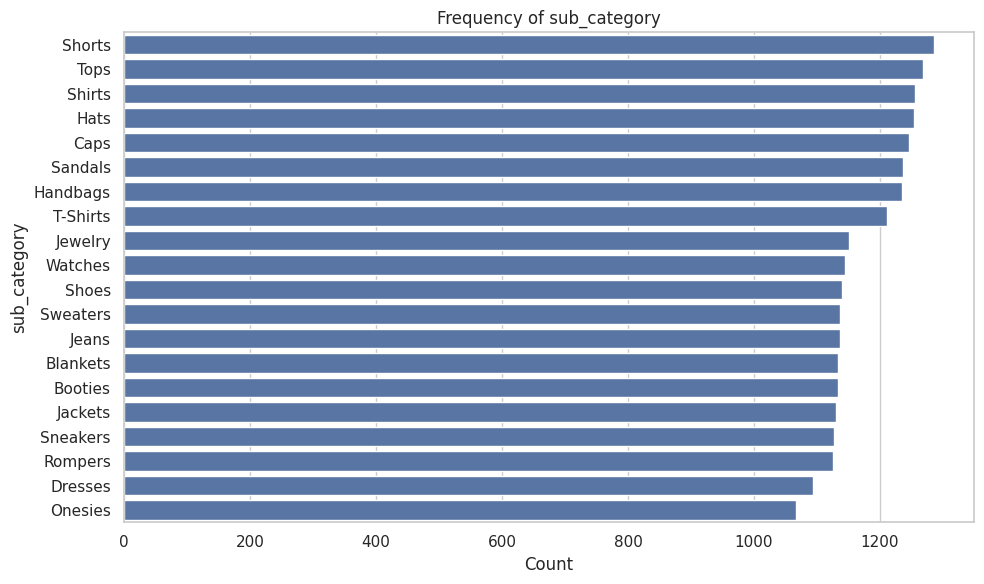

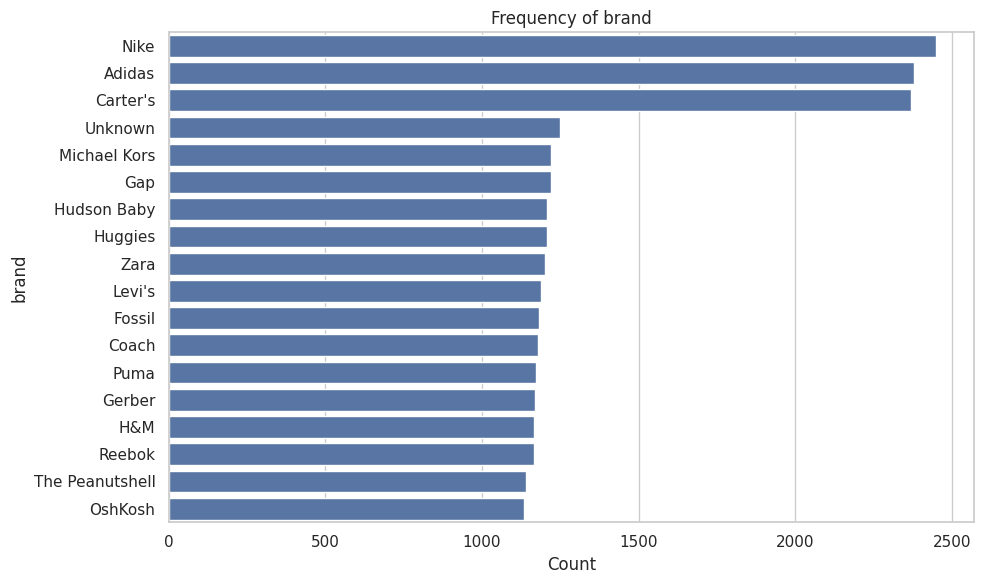

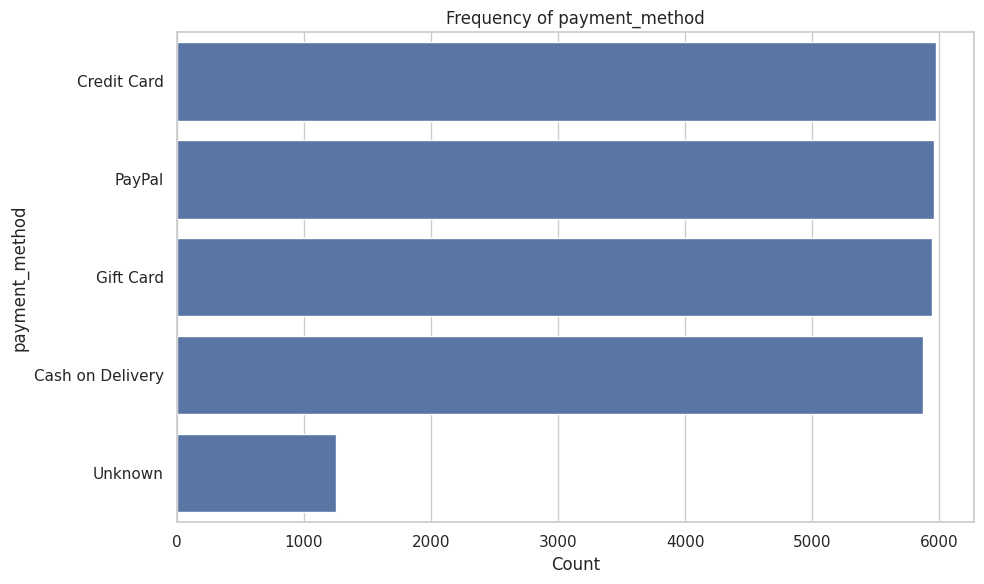

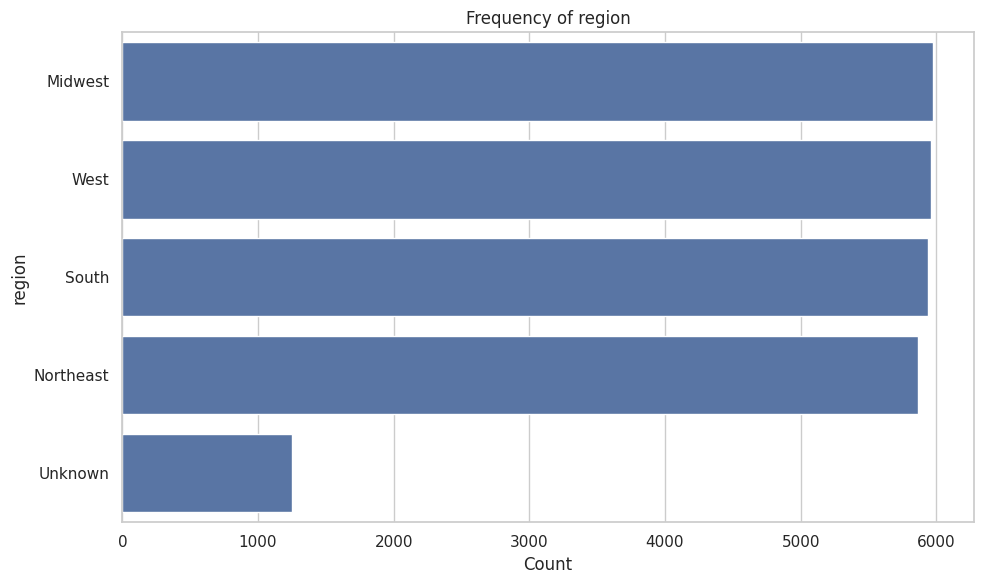

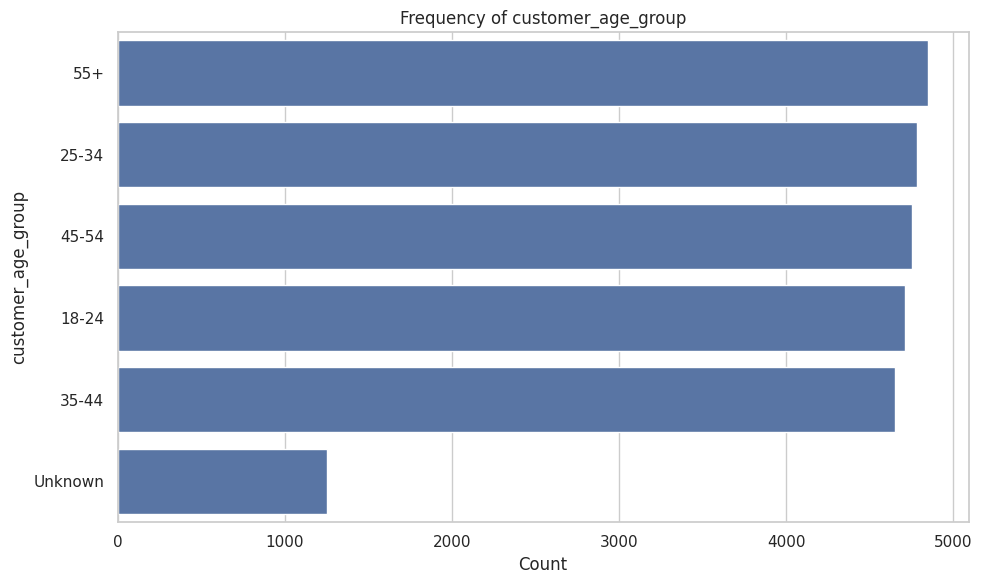

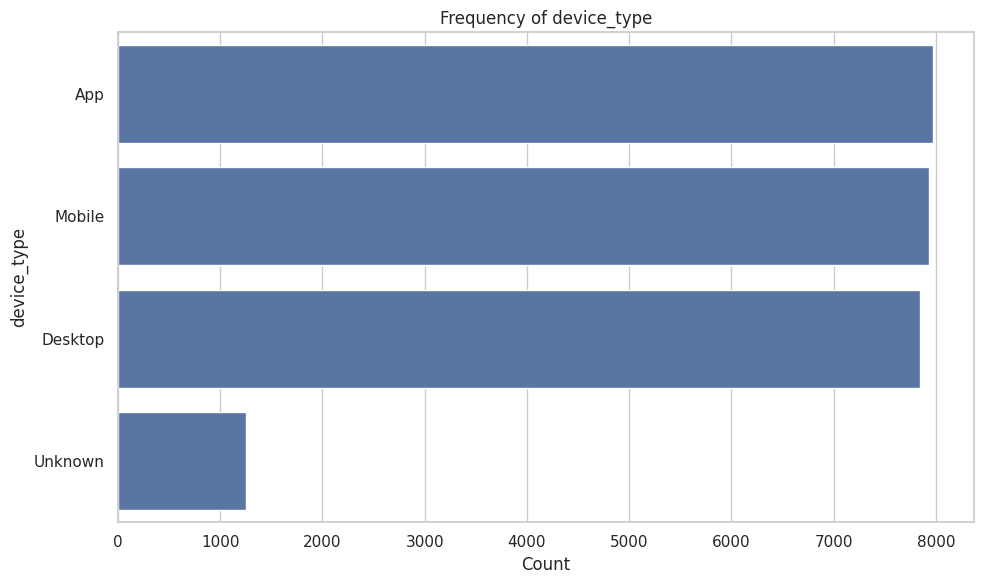

In [ ]:
categorical_cols = ['main_category', 'sub_category', 'brand', 'payment_method',
                    'region', 'customer_age_group', 'device_type']

for col in categorical_cols:
    plt.figure()
    value_counts = df[col].value_counts().sort_values(ascending=False).head(20)  # top 20
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

The categorical feature distributions show nearly uniform frequencies across categories, with the main variation arising from the presence of 'unknown' values.

In the brand column, **Nike**, **Adidas**, and **Carter** dominated, while the remaining brands appeared with nearly similar frequencies.

*--------------------Count of is Returned------------------------*


is_returned
0    22539
1     2461
Name: count, dtype: int64


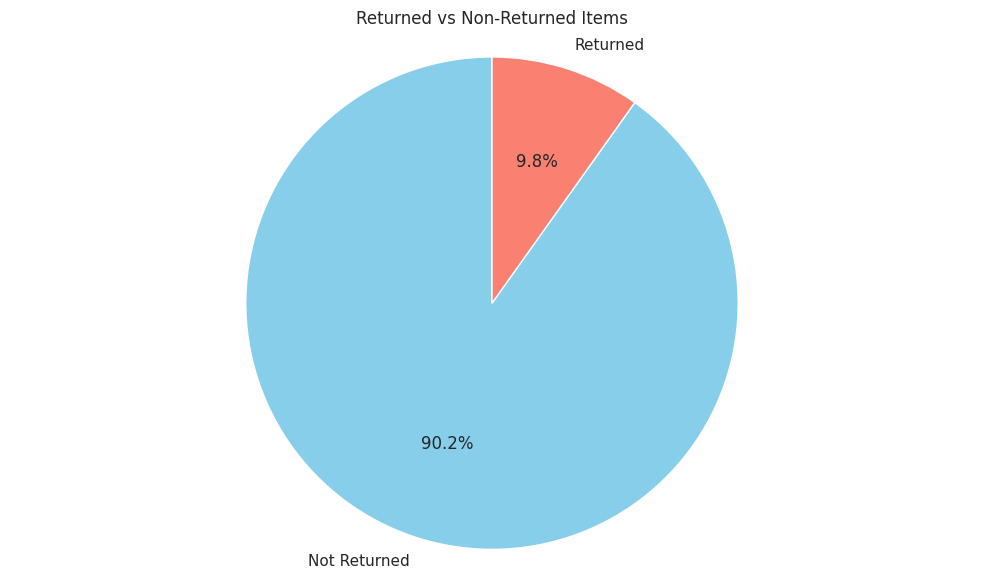

In [ ]:
plt.figure()
print("*--------------------Count of is Returned------------------------*\n\n")
print(df['is_returned'].value_counts())
return_counts = df['is_returned'].value_counts()
plt.pie(return_counts, labels=['Not Returned', 'Returned'] if 0 in return_counts.index else return_counts.index,
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Returned vs Non-Returned Items')
plt.axis('equal')
plt.tight_layout()
plt.show()

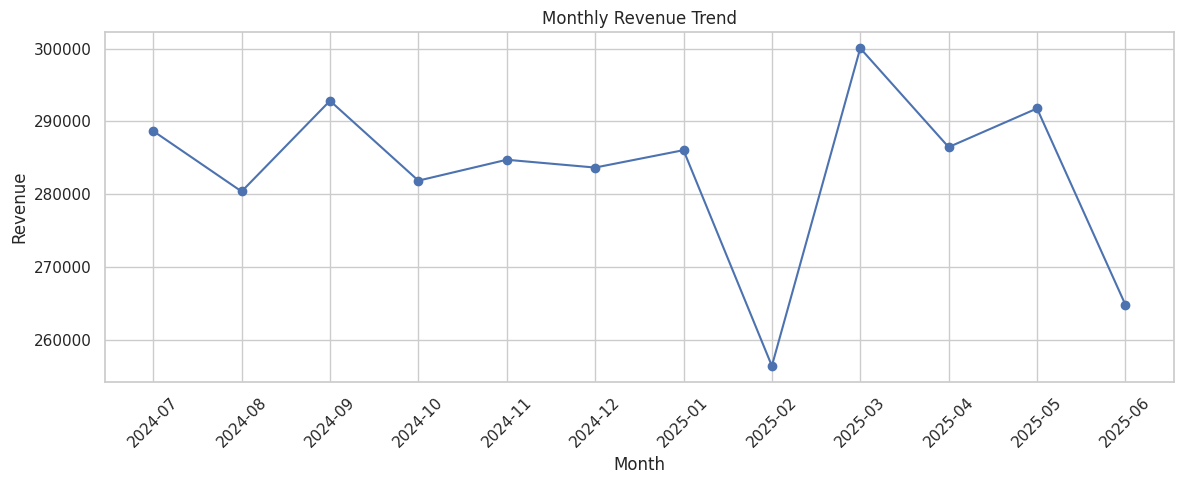

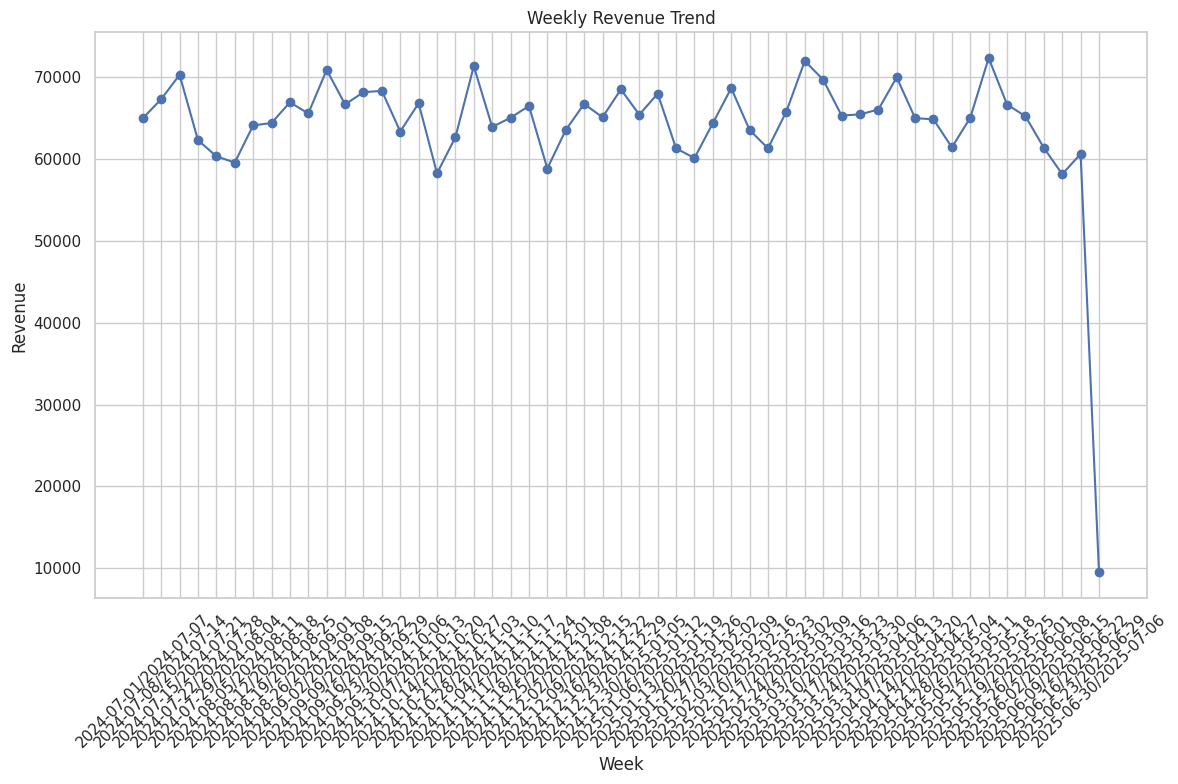

In [ ]:
# Monthly Revenue
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('order_month')['final_price'].sum().reset_index()

# Weekly Revenue
df['order_week'] = df['order_date'].dt.to_period('W')
weekly_revenue = df.groupby('order_week')['final_price'].sum().reset_index()

# Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['order_month'].astype(str), monthly_revenue['final_price'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(weekly_revenue['order_week'].astype(str), weekly_revenue['final_price'], marker='o')
plt.title('Weekly Revenue Trend')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Revenue trends show fluctuations over time. On a monthly basis, revenue peaked in March 2025, making it the highest revenue-generating month in the dataset. Weekly trends follow a similar fluctuating pattern, with March weeks contributing significantly to this peak

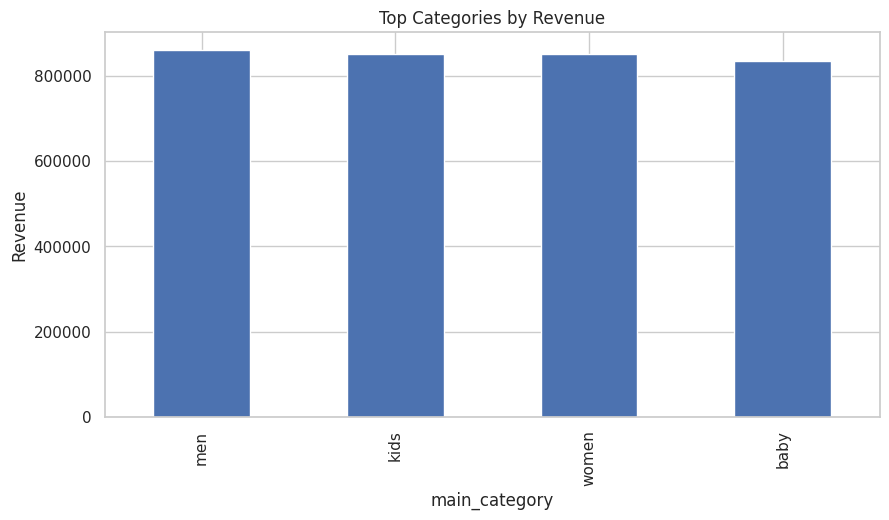

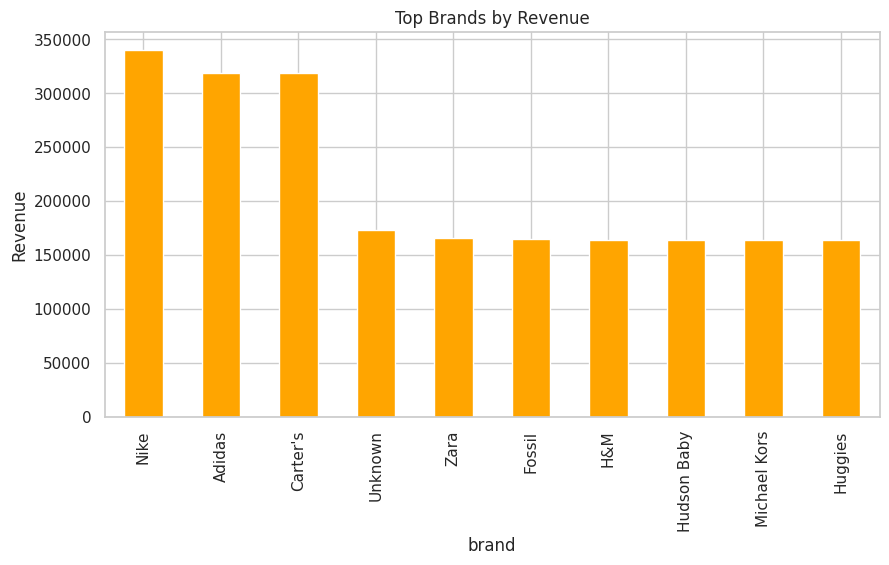

In [ ]:
# Revenue by Category
category_revenue = df.groupby('main_category')['final_price'].sum().sort_values(ascending=False).head(10)

# Revenue by Brand
brand_revenue = df.groupby('brand')['final_price'].sum().sort_values(ascending=False).head(10)

# Plotting
category_revenue.plot(kind='bar', figsize=(10, 5), title='Top Categories by Revenue')
plt.ylabel('Revenue')
plt.show()

brand_revenue.plot(kind='bar', figsize=(10, 5), title='Top Brands by Revenue', color='orange')
plt.ylabel('Revenue')
plt.show()


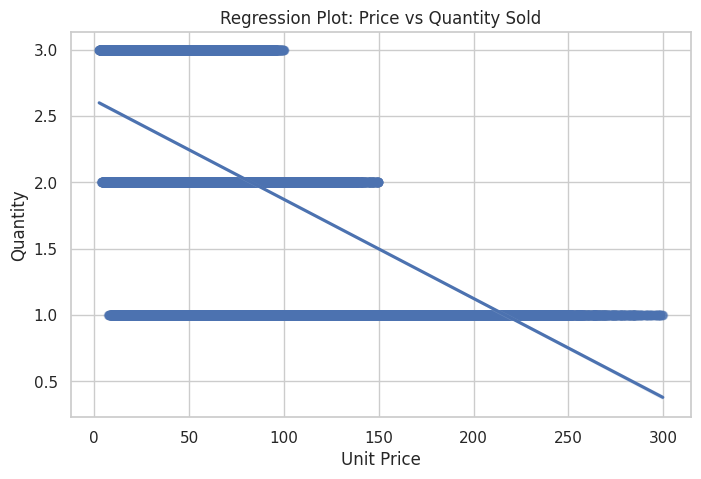

Correlation between unit price and quantity sold: -0.58


In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='unit_price', y='quantity', data=df, scatter_kws={'alpha':0.3})
plt.title('Regression Plot: Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

correlation = df['unit_price'].corr(df['quantity'])
print(f"Correlation between unit price and quantity sold: {correlation:.2f}")

There is a moderate negative correlation (-0.58) between unit price and quantity sold, indicating that as prices increase, the number of units sold tends to decrease.

In [ ]:
df.head(10)

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,delivery_days,is_returned,region,customer_age_group,device_type,discount_amount,unit_price,delivery_speed,order_month,order_week
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,...,5.0,0,Midwest,25-34,Mobile,11.8620,106.760,slow,2024-09,2024-09-09/2024-09-15
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,baby,Blankets,Gerber,26.84,1,15,...,8.0,0,West,25-34,Mobile,4.0260,22.810,slow,2025-06,2025-06-23/2025-06-29
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,men,Jeans,Fossil,219.38,2,25,...,5.0,0,Northeast,35-44,Mobile,54.8450,82.270,slow,2025-01,2025-01-06/2025-01-12
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,baby,Rompers,Carter's,12.05,1,0,...,3.0,0,Midwest,45-54,Mobile,0.0000,12.050,fast,2024-08,2024-08-26/2024-09-01
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,kids,Sneakers,Adidas,145.36,1,10,...,5.0,0,Unknown,45-54,Mobile,14.5360,130.820,slow,2024-11,2024-11-11/2024-11-17
5,#FW6RJW7J2CKO7L,0A4782087A93,CSS5YL285Y,Puma Shoes,men,Shoes,Puma,283.24,2,5,...,5.0,0,West,55+,App,14.1620,134.540,slow,2025-03,2025-03-17/2025-03-23
6,#ERYDKBGN6SJ9TK,1743A7859A02,PJAH83UXW7,Levi's Jeans,men,Jeans,Levi's,208.15,1,10,...,1.0,0,South,55+,Mobile,20.8150,187.340,fast,2025-01,2025-01-20/2025-01-26
7,#QOVOATLRIG0ZM2,974672411554,CMAV37VBNR,Gap Shirts,kids,Shirts,Gap,100.40,2,25,...,4.0,0,Midwest,Unknown,Unknown,25.1000,37.650,fast,2024-10,2024-10-14/2024-10-20
8,#UTRQMENIVCWK7G,275180868989,Z7UD12K6M9,Adidas Watches,men,Watches,Unknown,234.79,2,5,...,8.0,0,Northeast,25-34,Desktop,11.7395,111.525,slow,2025-03,2025-03-24/2025-03-30
9,#OKQTHH2LY9WEEB,203512125403,PKDFJH2MEK,Michael Kors Jewelry,women,Jewelry,Michael Kors,288.74,1,20,...,5.0,0,Midwest,18-24,Mobile,57.7480,230.990,slow,2025-06,2025-06-02/2025-06-08


In [ ]:
corr_qty = df['discount_percent'].corr(df['quantity'])
corr_rev = df['discount_percent'].corr(df['final_price'])

print(f"Correlation between discount and quantity sold: {corr_qty:.2f}")
print(f"Correlation between discount and revenue: {corr_rev:.2f}")


Correlation between discount and quantity sold: -0.00
Correlation between discount and revenue: -0.17


**Correlation between discount and quantity sold (-0.00)**: There is essentially no relationship between discounts and the number of units sold. This suggests that applying discounts did not significantly influence customers to buy more items.

**Correlation between discount and revenue (-0.17)**: There is a weak negative correlation, meaning that higher discounts are slightly associated with lower overall revenue. This indicates that while discounts reduce prices, they do not necessarily generate enough additional sales volume to offset the loss in revenue.

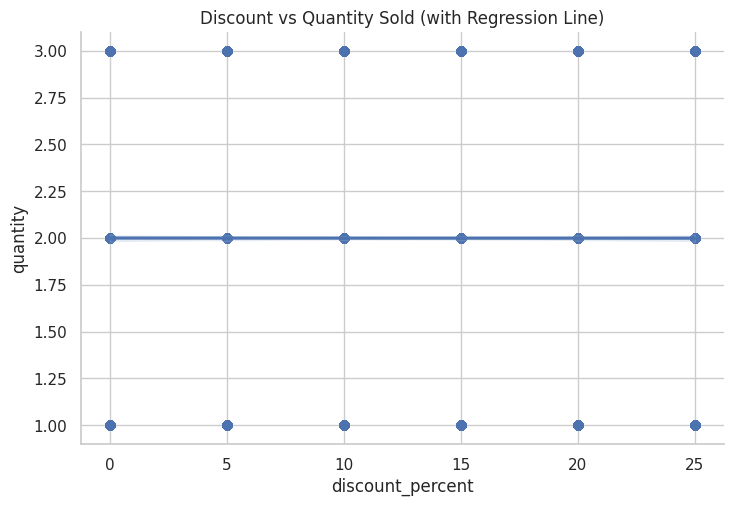

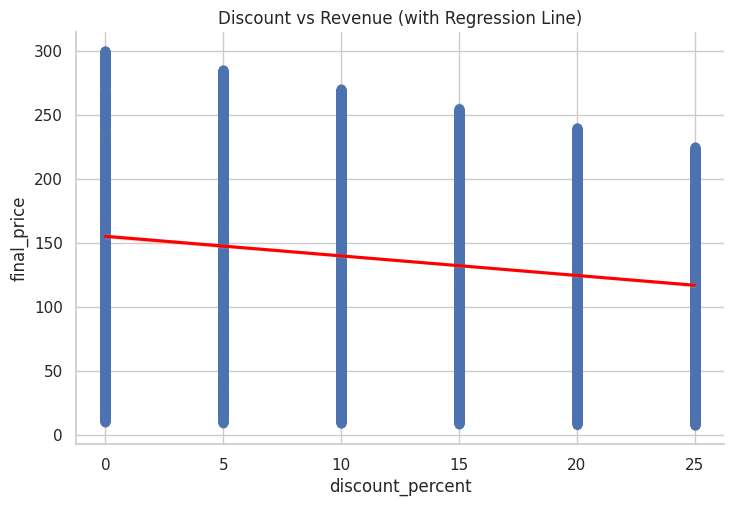

In [ ]:
import seaborn as sns

# Discount vs Quantity
sns.lmplot(x='discount_percent', y='quantity', data=df, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Discount vs Quantity Sold (with Regression Line)')
plt.grid(True)
plt.show()

# Discount vs Revenue
sns.lmplot(x='discount_percent', y='final_price', data=df, aspect=1.5, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Discount vs Revenue (with Regression Line)')
plt.grid(True)
plt.show()


In [ ]:
def calculate_return_rate(group_col):
    return_rate = df.groupby(group_col)['is_returned'].mean().reset_index()
    return_rate.columns = [group_col, 'return_rate']
    return return_rate.sort_values(by='return_rate', ascending=False)


In [ ]:
return_by_category = calculate_return_rate('main_category')
return_by_brand = calculate_return_rate('brand')
return_by_age_group = calculate_return_rate('customer_age_group')
return_by_device = calculate_return_rate('device_type')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_return_rate(df, group_col):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='return_rate', y=group_col, palette='viridis')
    plt.title(f'Return Rate by {group_col.capitalize()}')
    plt.xlabel('Return Rate')
    plt.ylabel(group_col.capitalize())
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()

/tmp/ipython-input-595344439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='return_rate', y=group_col, palette='viridis')


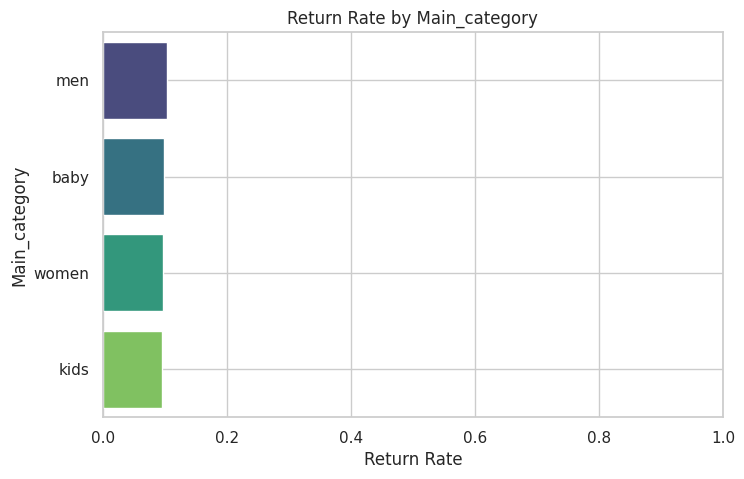

/tmp/ipython-input-595344439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='return_rate', y=group_col, palette='viridis')


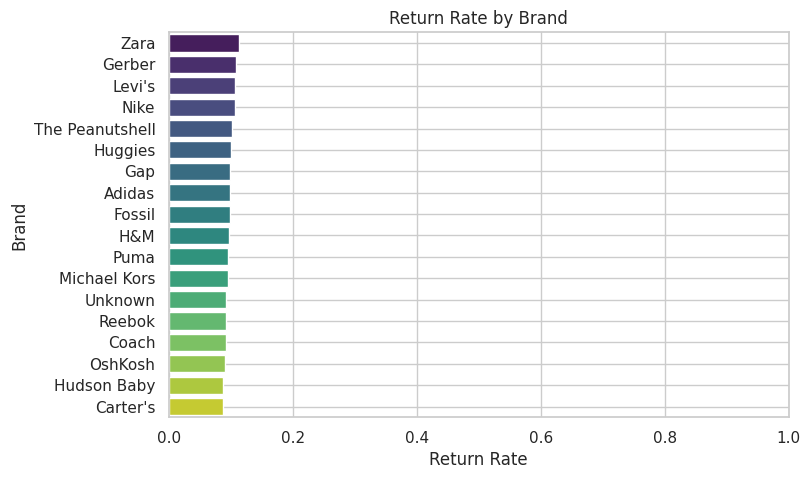

/tmp/ipython-input-595344439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='return_rate', y=group_col, palette='viridis')


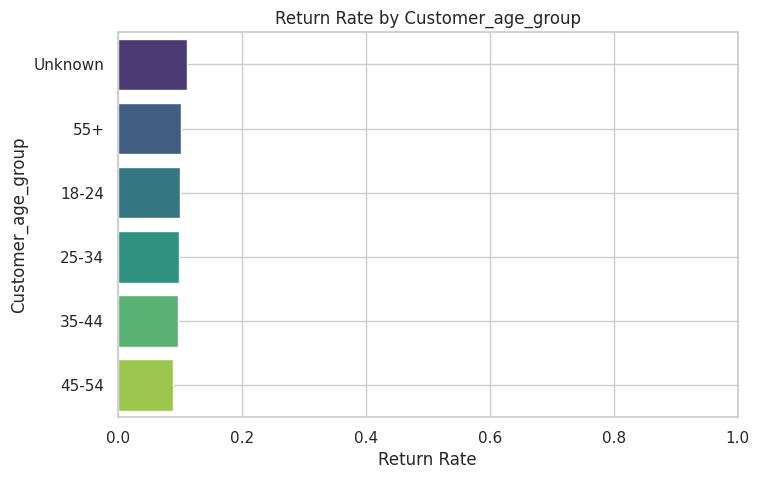

/tmp/ipython-input-595344439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='return_rate', y=group_col, palette='viridis')


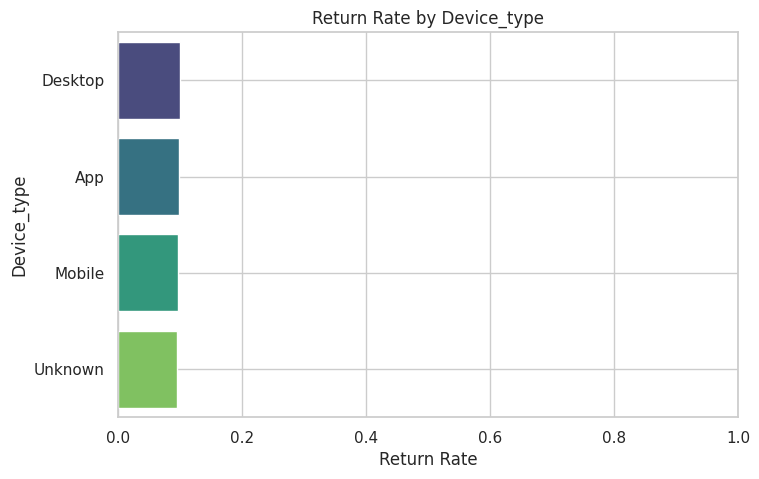

In [ ]:
plot_return_rate(return_by_category, 'main_category')
plot_return_rate(return_by_brand, 'brand')
plot_return_rate(return_by_age_group, 'customer_age_group')
plot_return_rate(return_by_device, 'device_type')

The return rate analysis across different categories, brands, customer age groups, and device types shows that the return rate is almost the same across all groups. This indicates that product returns are not strongly influenced by product type, brand preference, customer demographics, or shopping devices.

**In other words:**

**Product categories** → All categories experience similar return rates, suggesting that no particular category suffers disproportionately from returns.

**Brands** → Even top brands like Nike, Adidas, and Carter, as well as other brands, show comparable return behavior, indicating consistent customer satisfaction (or dissatisfaction) across brands.

**Age groups** → Different customer segments by age return items at nearly the same rate, showing that age does not significantly affect return behavior.

**Device types** → Whether customers shop via desktop, mobile, or tablet, the return rate remains steady, suggesting the shopping platform has little impact on return likelihood.

**Key Insight**: Since return rates are consistent across all segments, the primary drivers of returns may lie elsewhere—such as product quality issues, sizing/fit mismatches, or logistics factors (like delivery accuracy) rather than customer demographics or shopping behavior.

In [ ]:
import pandas as pd

# Calculate total spend per customer
customer_spend = df.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),
    order_count=('order_id', 'nunique')
).reset_index()

# Define high-value customers as top 20% by spend
spend_threshold = customer_spend['total_spend'].quantile(0.8)
customer_spend['segment'] = customer_spend['total_spend'].apply(
    lambda x: 'High-Value' if x >= spend_threshold else 'One-Time Buyer'
)

high_value_customers = customer_spend[customer_spend['segment'] == 'High-Value']
high_value_customers = high_value_customers.sort_values(by='total_spend', ascending=False)

print("\nHigh-Value Customers with Total Spend:")
print(high_value_customers[['customer_id', 'total_spend']])
print("\n\nCustomer Segmentation Count:")
print(customer_spend['segment'].value_counts())

# Calculate AOV = total revenue / number of orders
aov_region = df.groupby('region').agg(
    total_revenue=('final_price', 'sum'),
    total_orders=('order_id', 'nunique')
)
aov_region['AOV'] = aov_region['total_revenue'] / aov_region['total_orders']

aov_age_group = df.groupby('customer_age_group').agg(
    total_revenue=('final_price', 'sum'),
    total_orders=('order_id', 'nunique')
)
aov_age_group['AOV'] = aov_age_group['total_revenue'] / aov_age_group['total_orders']

print("\nAOV by Region:")
print(aov_region[['AOV']])

print("\nAOV by Age Group:")
print(aov_age_group[['AOV']])



High-Value Customers with Total Spend:
        customer_id  total_spend
23873  A56869856972       299.93
885    06863641A452       299.83
18800  838978733223       299.80
4913   24A4A7913710       299.76
18577  828511750A15       299.74
...             ...          ...
15793  7093675A7176       210.34
11851  5414A155878A       210.30
24131  A6A51A109399       210.30
24473  A86526519732       210.30
21443  948828765162       210.30

[5000 rows x 2 columns]


Customer Segmentation Count:
segment
One-Time Buyer    20000
High-Value         5000
Name: count, dtype: int64

AOV by Region:
                  AOV
region               
Midwest    135.020294
Northeast  137.880460
South      136.410493
Unknown    135.625416
West       134.424666

AOV by Age Group:
                           AOV
customer_age_group            
18-24               137.593372
25-34               136.619185
35-44               135.556230
45-54               135.584192
55+                 134.060571
Unknown             

**Customer Segmentation**

Customers were segmented into High-Value (top 20% by spend) and One-Time Buyers (remaining 80%).

Out of 25,000 customers, 5,000 (20%) fall into the High-Value group, while 20,000 (80%) are classified as One-Time Buyers.

High-value customers spend significantly more, with top spenders reaching close to $300 each.

**AOV (Average Order Value) by Region**

AOV is relatively consistent across regions, ranging from $134 to $138.

The Northeast shows the highest AOV ($137.88), while the West has the lowest AOV ($134.42).

The "Unknown" region also follows a mid-range pattern ($135.63), indicating missing region data does not heavily distort results.

**AOV by Customer Age Group**

AOV also shows minor variation across age groups, with values clustering between $134 and $138.

Younger customers (18–24) have the highest AOV ($137.59), suggesting stronger spending per order.

Older customers (55+) have the lowest AOV ($134.06), indicating slightly more conservative spending.

The "Unknown" age group aligns closely with younger age groups ($136.59).

/tmp/ipython-input-3131904199.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_region = df.groupby('region').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())


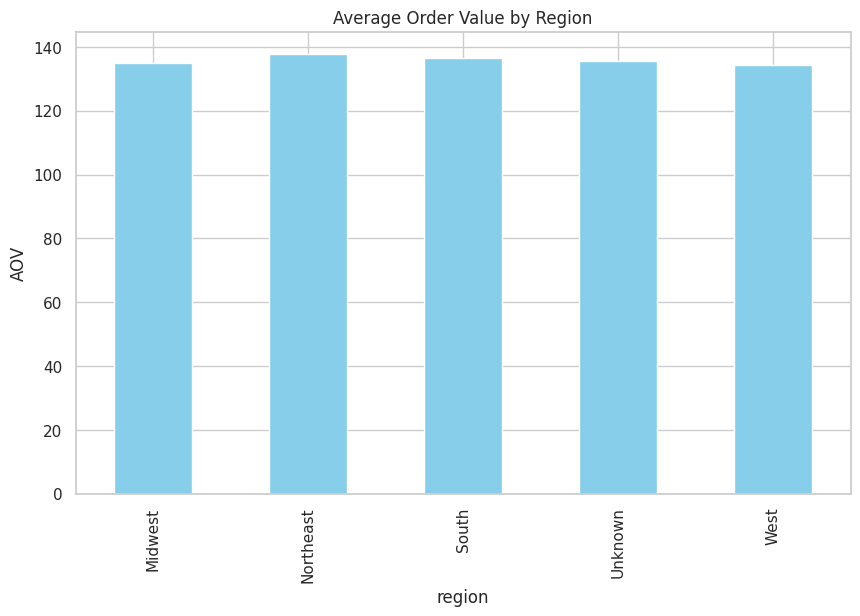

/tmp/ipython-input-3131904199.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())


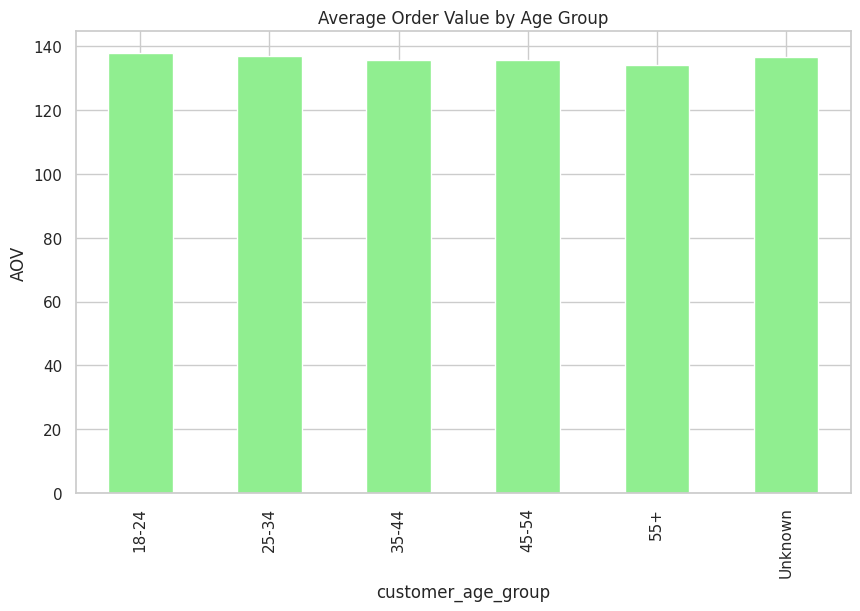

In [ ]:
aov_region = df.groupby('region').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())
aov_region.plot(kind='bar', color='skyblue', title="Average Order Value by Region")
plt.ylabel("AOV")
plt.show()

# AOV by age group
aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())
aov_age.plot(kind='bar', color='lightgreen', title="Average Order Value by Age Group")
plt.ylabel("AOV")
plt.show()

/tmp/ipython-input-1820082868.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_region = df.groupby('region').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())


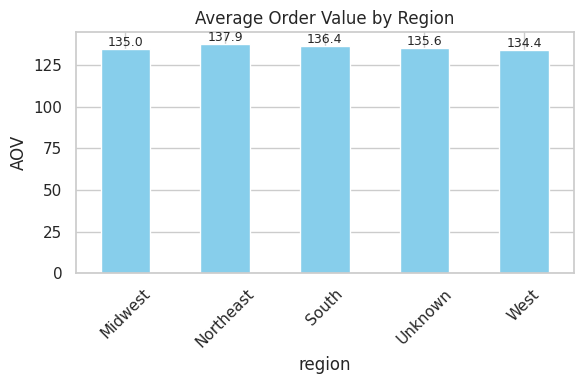

/tmp/ipython-input-1820082868.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())


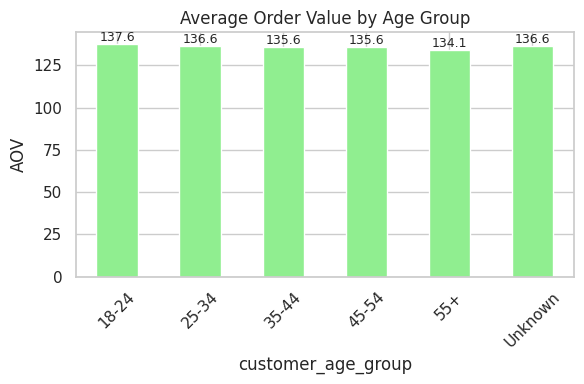

In [ ]:
import matplotlib.pyplot as plt

# AOV by region
aov_region = df.groupby('region').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())

plt.figure(figsize=(6,4))
bars = aov_region.plot(kind='bar', color='skyblue', title="Average Order Value by Region")
plt.ylabel("AOV")
plt.xticks(rotation=45)

# labels
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# AOV by age group
aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())

plt.figure(figsize=(6,4))
bars = aov_age.plot(kind='bar', color='lightgreen', title="Average Order Value by Age Group")
plt.ylabel("AOV")
plt.xticks(rotation=45)

# Add value labels
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

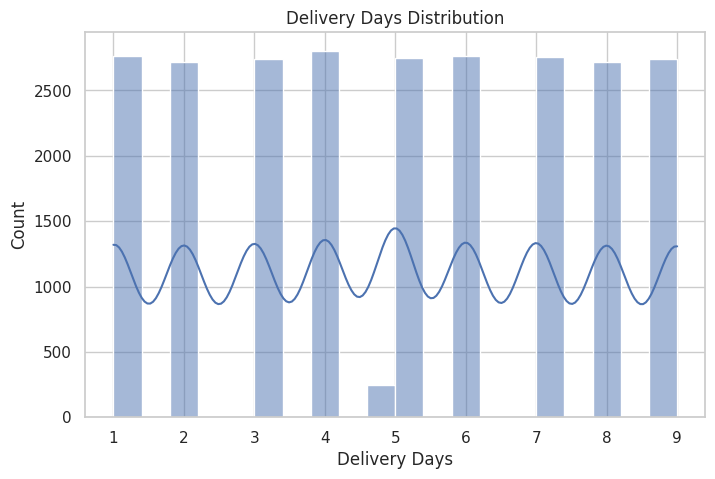

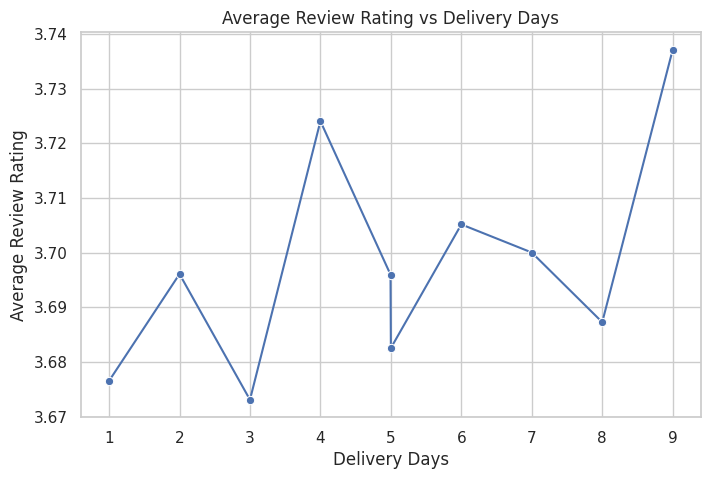

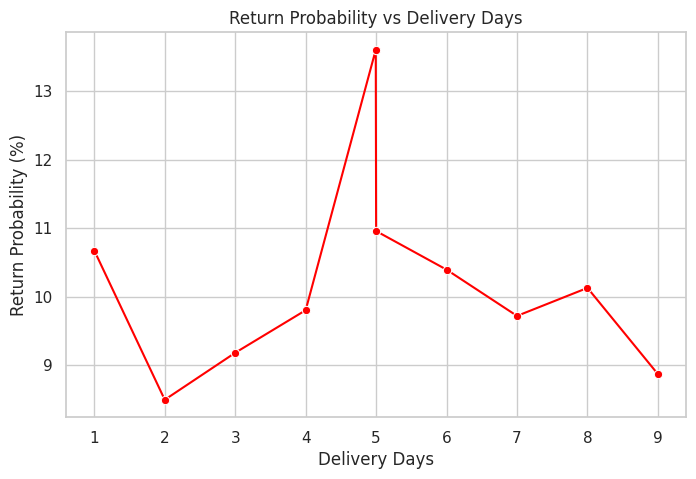

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Delivery Days Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_days'], bins=20, kde=True)
plt.title("Delivery Days Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Count")
plt.show()

# 2) Effect on Review Rating
rating_by_delivery = df.groupby('delivery_days')['review_rating'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=rating_by_delivery, x='delivery_days', y='review_rating', marker='o')
plt.title("Average Review Rating vs Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Average Review Rating")
plt.show()

# 3) Effect on Return Probability
# Calculate return probability per delivery day
return_prob = df.groupby('delivery_days')['is_returned'].mean().reset_index()
return_prob['is_returned'] *= 100

plt.figure(figsize=(8,5))
sns.lineplot(data=return_prob, x='delivery_days', y='is_returned', marker='o', color='red')
plt.title("Return Probability vs Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Return Probability (%)")
plt.show(


**1. Delivery Days Distribution**

The histogram shows the overall spread of delivery times.
If most deliveries fall within a specific range (e.g., 3–7 days), that represents the typical customer experience.
Outliers (very short or very long delivery times) may exist but are less frequent.

**2. Average Review Rating vs Delivery Days**

You observed that average review rating is highest when delivery takes 9 days.
This is counterintuitive because we usually expect faster deliveries to yield better satisfaction. Possible explanations:
Product Quality Effect: Items that naturally require longer delivery (e.g., premium, imported, or customized products) might be higher-quality items, leading to higher ratings despite the wait.
Customer Expectation Effect: Customers ordering special products may expect delays and are more tolerant, rating based on product quality rather than speed.
Low Sample Size Bias: If only a few orders fall in the “9 days” bucket, the higher average could be due to randomness or small data volume.

**3. Return Probability vs Delivery Days**

The return probability is highest at 5 delivery days.
This suggests that items delivered in around 5 days may face issues that trigger returns. Possible reasons:
Product Category Effect: Products that usually ship in ~5 days might be fashion or size-dependent categories (clothing, shoes, etc.), which naturally have higher return rates.
Customer Expectation Mismatch: 5 days may be a “gray zone” where delivery is not too fast, but not slow enough to adjust expectations, leading to more dissatisfaction if the product isn’t perfect.
Operational/Logistics Effect: Some suppliers or warehouses with ~5 day delivery cycles may have inconsistent product quality or higher error rates in fulfillment.

Average Rating by Brand:
           brand  review_rating
3         Fossil       3.737954
10  Michael Kors       3.734208
12       OshKosh       3.731041
9         Levi's       3.730866
17          Zara       3.729167
11          Nike       3.703840
0         Adidas       3.701850
16       Unknown       3.701600
8        Huggies       3.700331
1       Carter's       3.699873

Average Rating by Category:
  main_category  review_rating
2           men       3.712440
1          kids       3.700285
3         women       3.697316
0          baby       3.681899

Average Rating by Region:
      region  review_rating
3    Unknown       3.724000
1  Northeast       3.703306
2      South       3.699041
0    Midwest       3.695100
4       West       3.689366


/tmp/ipython-input-3855272265.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='review_rating', y='brand', palette='viridis')


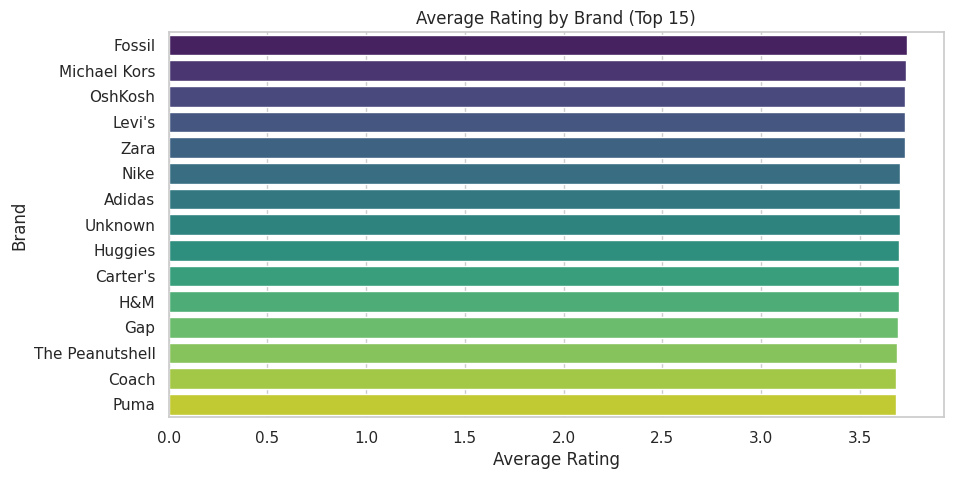


Return Probability by Rating:
   review_rating  is_returned
0              1    10.047847
1              2     9.391588
2              3     9.290808
3              4     9.980178
4              5    10.212697


/tmp/ipython-input-3855272265.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=return_prob_by_rating, x='review_rating', y='is_returned', palette='coolwarm')


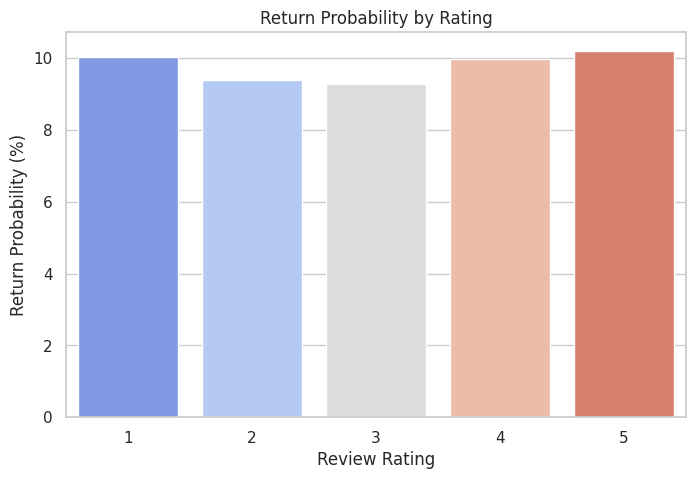


Return Probability for Low Ratings (<= 2): 9.61%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rating_brand = df.groupby('brand')['review_rating'].mean().reset_index()
avg_rating_category = df.groupby('main_category')['review_rating'].mean().reset_index()
avg_rating_region = df.groupby('region')['review_rating'].mean().reset_index()

print("Average Rating by Brand:")
print(avg_rating_brand.sort_values('review_rating', ascending=False).head(10))

print("\nAverage Rating by Category:")
print(avg_rating_category.sort_values('review_rating', ascending=False))

print("\nAverage Rating by Region:")
print(avg_rating_region.sort_values('review_rating', ascending=False))

# Average Rating by Brand (Top 15 brands)
plt.figure(figsize=(10,5))
top_brands = avg_rating_brand.sort_values('review_rating', ascending=False).head(15)
sns.barplot(data=top_brands, x='review_rating', y='brand', palette='viridis')
plt.title("Average Rating by Brand (Top 15)")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()


# 2) Correlate Low Ratings with Subsequent Returns

#"low rating" threshold (<= 2 stars)
low_rating_threshold = 2

#return probability for low ratings vs others
return_prob_by_rating = df.groupby('review_rating')['is_returned'].mean().reset_index()
return_prob_by_rating['is_returned'] *= 100

print("\nReturn Probability by Rating:")
print(return_prob_by_rating)

# Return Probability vs Rating
plt.figure(figsize=(8,5))
sns.barplot(data=return_prob_by_rating, x='review_rating', y='is_returned', palette='coolwarm')
plt.title("Return Probability by Rating")
plt.xlabel("Review Rating")
plt.ylabel("Return Probability (%)")
plt.show()

# Specific correlation for low ratings
low_rating_returns = df[df['review_rating'] <= low_rating_threshold]['is_returned'].mean() * 100
print(f"\nReturn Probability for Low Ratings (<= {low_rating_threshold}): {low_rating_returns:.2f}%")


**1. Average Rating by Brand**

The average ratings across brands are very close to each other, all around 3.7 out of 5.
Fossil (3.74), Michael Kors (3.73), and OshKosh (3.73) lead slightly.
Zara (3.73) and Nike (3.70) are near the lower end, but the differences are minimal (only about 0.03 points difference across brands).

**Interpretation:**

Customer satisfaction, as reflected by review ratings, appears to be consistent across brands. This suggests that product quality or customer experience is relatively uniform, and brand itself may not be a major driver of rating differences.

**2. Average Rating by Category**

Men’s products (3.71) have the highest average rating.
Kids (3.70) and Women (3.70) follow very closely.
Baby (3.68) is slightly lower but still within a narrow band.

**Interpretation:**

There’s no strong variation in ratings by product category. The results suggest customers perceive product quality fairly similarly across men, women, kids, and baby categories. The small dip for baby items could hint at slightly higher expectations or quality concerns in that segment.

**3. Average Rating by Region**

Unknown region (3.72) has the highest ratings (possibly due to missing/incomplete data).
Northeast (3.70) is slightly higher than South (3.70), Midwest (3.70), and West (3.69).

**Interpretation:**

The regional differences are negligible, all clustered around 3.70. This indicates region does not significantly impact customer ratings—product/service perception is fairly consistent nationwide.

**4. Return Probability by Rating**

Surprisingly, the return probability is around 9–10% across all rating levels (1 to 5).
Even high ratings (5 stars) correspond to a 10.2% return probability, which is actually slightly higher than lower ratings.
1-star reviews also have a ~10% return rate, which is very similar.

**Interpretation:**

This suggests a disconnect between product ratings and returns:
Customers may return products for reasons unrelated to dissatisfaction, such as size issues, shipping delays, or ordering mistakes.
Conversely, even satisfied customers (high ratings) may still return products if they don’t meet fit, style, or utility needs.
This indicates that returns are not directly driven by dissatisfaction (unlike in many industries). Instead, they may be driven by logistical factors (size/fit mismatch, expectations vs. reality, gifting errors).

Return Likelihood by Payment Method:
     payment_method  is_returned
2         Gift Card    10.589226
3            PayPal    10.135929
4           Unknown    10.080000
1       Credit Card     9.690377
0  Cash on Delivery     8.900613


/tmp/ipython-input-754545985.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_return, x='payment_method', y='is_returned', palette='coolwarm')


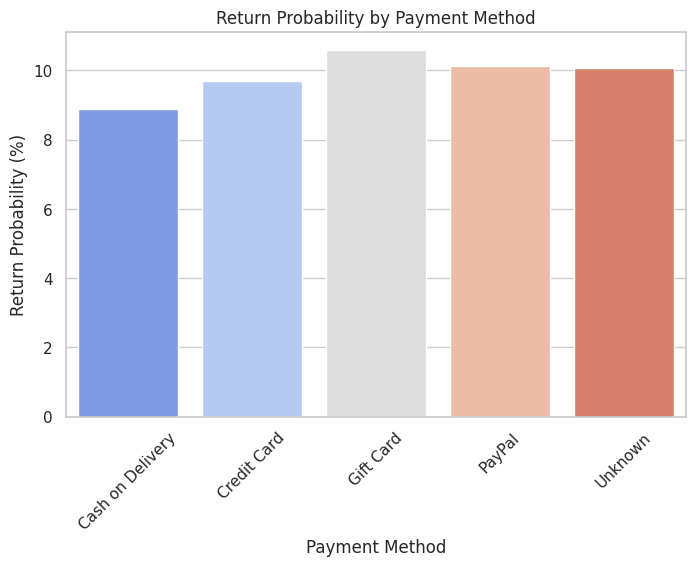


Average Spend by Payment Method:
     payment_method  final_price
2         Gift Card   137.239886
4           Unknown   135.806192
0  Cash on Delivery   135.767531
1       Credit Card   135.424847
3            PayPal   135.233952


/tmp/ipython-input-754545985.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_spend, x='payment_method', y='final_price', palette='viridis')


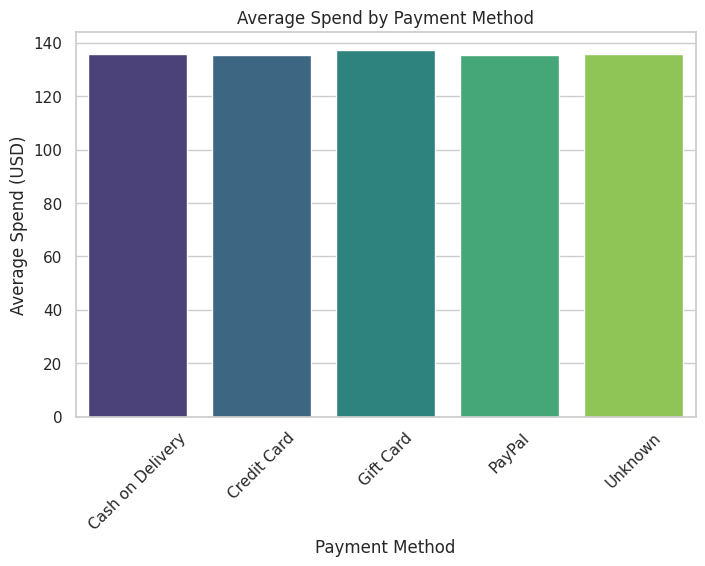

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Return Likelihood by Payment Method

payment_return = df.groupby('payment_method')['is_returned'].mean().reset_index()
payment_return['is_returned'] *= 100  # percentage

print("Return Likelihood by Payment Method:")
print(payment_return.sort_values('is_returned', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=payment_return, x='payment_method', y='is_returned', palette='coolwarm')
plt.title("Return Probability by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Return Probability (%)")
plt.xticks(rotation=45)
plt.show()

# 2) Average Spend by Payment Method

payment_spend = df.groupby('payment_method')['final_price'].mean().reset_index()

print("\nAverage Spend by Payment Method:")
print(payment_spend.sort_values('final_price', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(data=payment_spend, x='payment_method', y='final_price', palette='viridis')
plt.title("Average Spend by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Spend (USD)")
plt.xticks(rotation=45)
plt.show()


**Gift Cards drive the highest spend (≈137.24):**

Customers using gift cards tend to spend slightly more compared to other payment methods.
This could be because gift cards are often given as presents, and customers may use them fully even if the purchase value slightly exceeds the card balance.

**Unknown category is second (≈135.81):**

Transactions without a clearly identified payment method also show relatively higher spending.
This could reflect data recording issues, or certain offline payment channels not being captured correctly.

**Cash on Delivery (≈135.77) ranks third:**

COD transactions still maintain strong average spend, which might reflect customer confidence in paying upon delivery.
However, COD often has higher return rates in e-commerce, so while spend is healthy, profitability could be affected.

**Credit Card (≈135.42) and PayPal (≈135.23)**

show slightly lower average spend:
These digital payment methods are still widely used but do not lead to higher ticket sizes compared to gift cards.
Customers using credit cards or PayPal may be more price conscious or may split purchases across multiple transactions.

**Key Insights:**

Gift Cards encourage higher spending – potential to promote gift card campaigns, especially during holidays and sales seasons.
Unknown category needs investigation – clarifying or correcting this could improve accuracy in spend analysis.
COD still holds significance – though not the highest, COD’s spend is competitive, showing customers are comfortable with it.
Digital Payments have stable but slightly lower spend -> promotions or loyalty points for credit card/PayPal users could increase the average order value (AOV).

Return Rate by Device Type:
  device_type  is_returned
0         App     9.844495
1     Desktop    10.022953
2      Mobile     9.717671
3     Unknown     9.520000


/tmp/ipython-input-1345648776.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=return_by_device, x='device_type', y='is_returned', palette='coolwarm')


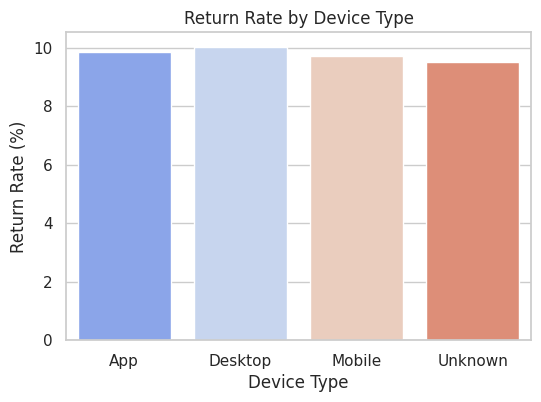


Average Delivery Days by Region:
      region  delivery_days
0    Midwest       4.976195
1  Northeast       5.021427
2      South       4.952141
3    Unknown       5.105543
4       West       5.006829


/tmp/ipython-input-1345648776.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delivery_by_region, x='region', y='delivery_days', palette='viridis')


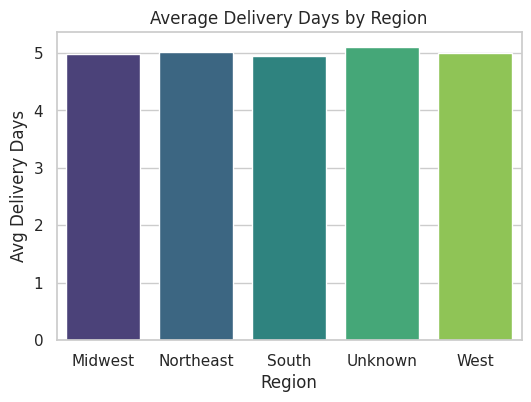


Average Discount Used by Age Group:
  customer_age_group  discount_percent
0              18-24         12.585475
1              25-34         12.518286
2              35-44         12.522029
3              45-54         12.486327
4                55+         12.571664
5            Unknown         12.348000


/tmp/ipython-input-1345648776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_by_age, x='customer_age_group', y='discount_percent', palette='magma')


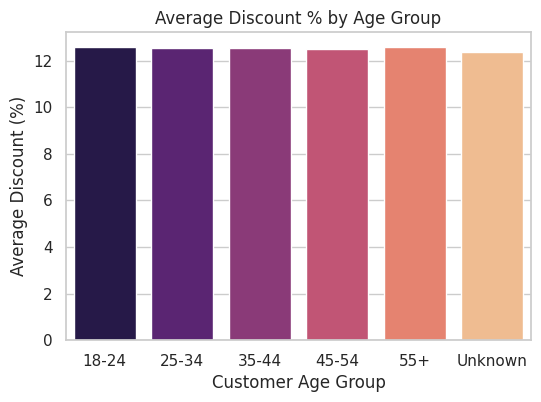

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Return Rate: Mobile vs Desktop
return_by_device = df.groupby('device_type')['is_returned'].mean().reset_index()
return_by_device['is_returned'] *= 100  # percentage

print("Return Rate by Device Type:")
print(return_by_device)

plt.figure(figsize=(6,4))
sns.barplot(data=return_by_device, x='device_type', y='is_returned', palette='coolwarm')
plt.title("Return Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Return Rate (%)")
plt.show()

# 2) Region vs Delivery Performance (avg delivery days)
delivery_by_region = df.groupby('region')['delivery_days'].mean().reset_index()

print("\nAverage Delivery Days by Region:")
print(delivery_by_region)

plt.figure(figsize=(6,4))
sns.barplot(data=delivery_by_region, x='region', y='delivery_days', palette='viridis')
plt.title("Average Delivery Days by Region")
plt.xlabel("Region")
plt.ylabel("Avg Delivery Days")
plt.show()

# 3) Age Group vs Discount Sensitivity
# (Average discount percent used per age group)
discount_by_age = df.groupby('customer_age_group')['discount_percent'].mean().reset_index()

print("\nAverage Discount Used by Age Group:")
print(discount_by_age)

plt.figure(figsize=(6,4))
sns.barplot(data=discount_by_age, x='customer_age_group', y='discount_percent', palette='magma')
plt.title("Average Discount % by Age Group")
plt.xlabel("Customer Age Group")
plt.ylabel("Average Discount (%)")
plt.show()


**1. Return Rate by Device Type**

Desktop (10.02%) has the highest return rate, slightly higher than App (9.84%) and Mobile (9.71%).
Unknown devices (9.52%) have the lowest return rate.

**Interpretation:**

Desktop shoppers might be more cautious or more likely to return products, perhaps because they engage in bulk purchases or compare more alternatives.
Mobile and App users show slightly lower return rates, which could suggest higher purchase confidence or impulse buying.

**Business Implication:**

Encouraging app/mobile usage may help reduce returns marginally. Additional customer education or better product descriptions for desktop users could help lower their return rate.

**2. Average Delivery Days by Region**

Delivery times are fairly consistent across regions (4.95–5.10 days).
South (4.95 days) is the fastest, while Unknown regions (5.10 days) take the longest.

**Interpretation:**

The difference between regions is minimal (only ~0.15 days), showing strong logistics consistency.
Slightly slower times in "Unknown" may reflect incomplete shipping data or less optimized routes.

**Business Implication: **

Overall delivery performance is good. Optimizing last-mile logistics in "Unknown" and Northeast could improve customer experience further.

**3. Average Discount Used by Age Group**

Discounts are very similar across all age groups (≈12.5%), with only a small variation.
18–24 (12.59%) and 55+ (12.57%) use slightly higher discounts.
Unknown group (12.35%) uses the least.

**Interpretation:**

Younger shoppers (18–24) may be more price-sensitive, actively seeking deals.
Older shoppers (55+) may also be more motivated by discounts, possibly reflecting fixed incomes.
Middle-aged groups (25–54) are slightly less discount-driven but still within the same range.

**Business Implication:**

Discount campaigns appeal across all age groups, but tailoring messages to younger and older demographics could yield the most engagement.

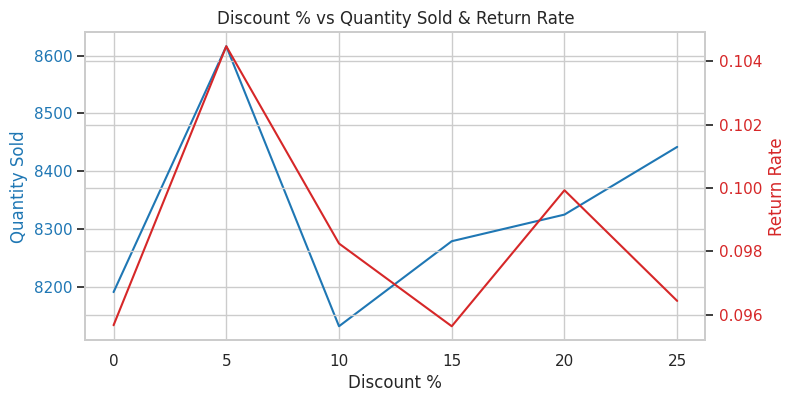

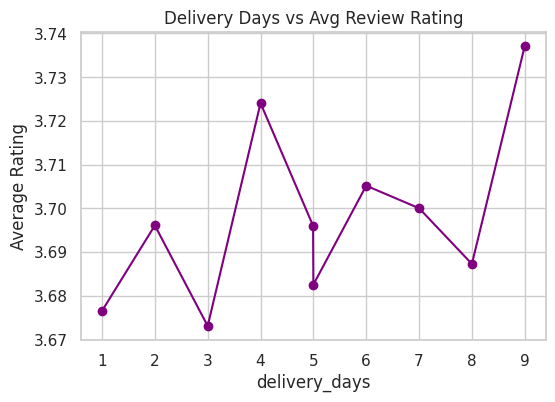

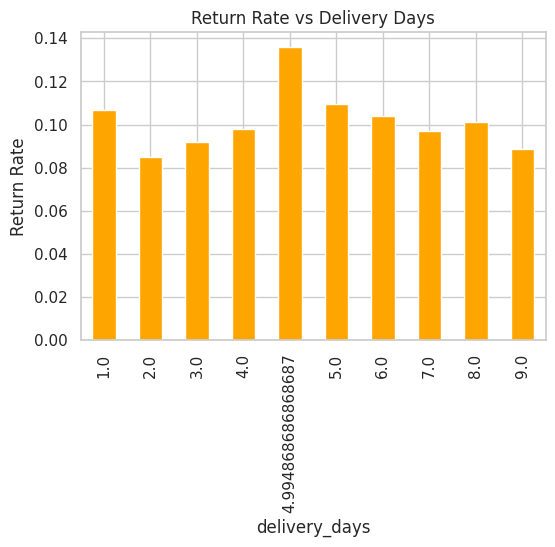

/tmp/ipython-input-3838960670.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())


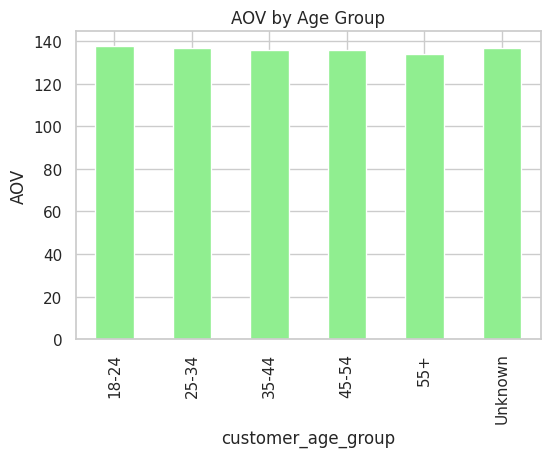

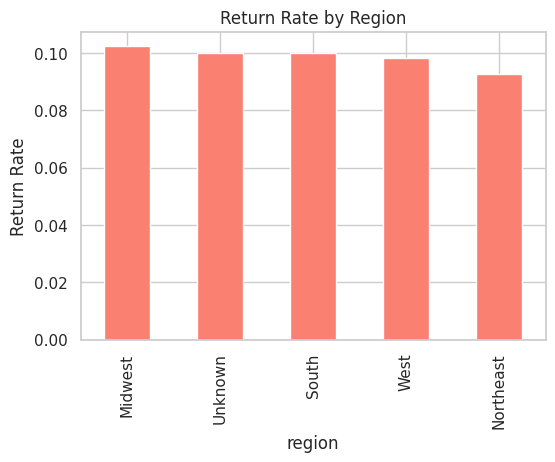

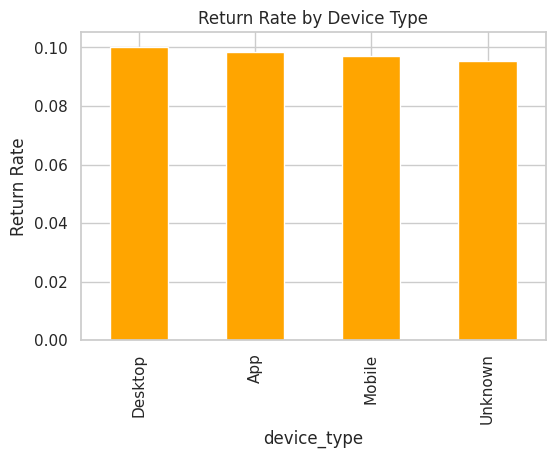

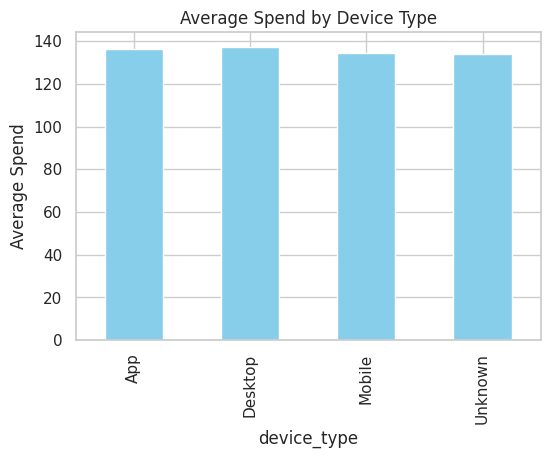

brand
Carter's        0.088223
Hudson Baby     0.088503
OshKosh         0.091711
Coach           0.092451
Reebok          0.092545
Unknown         0.092800
Michael Kors    0.095160
Puma            0.095563
H&M             0.097686
Fossil          0.098901
Name: is_returned, dtype: float64


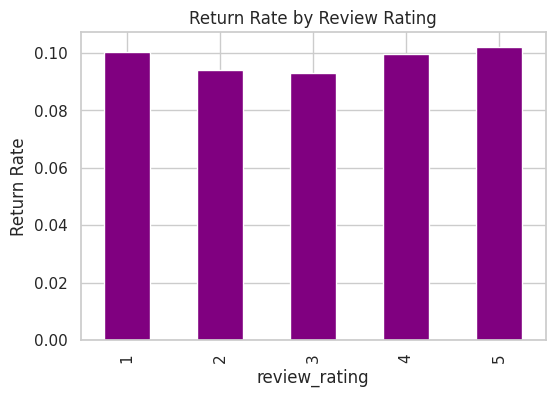

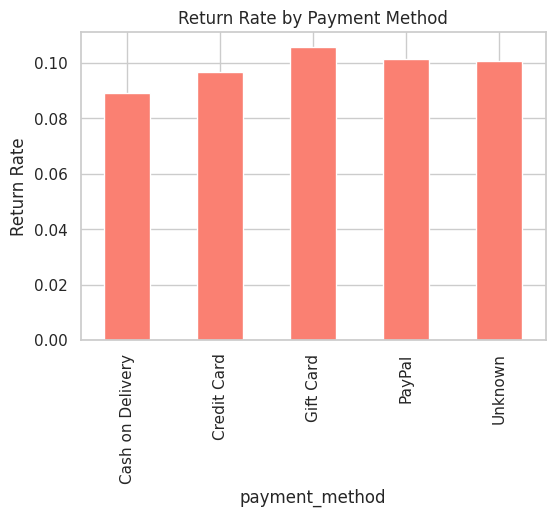

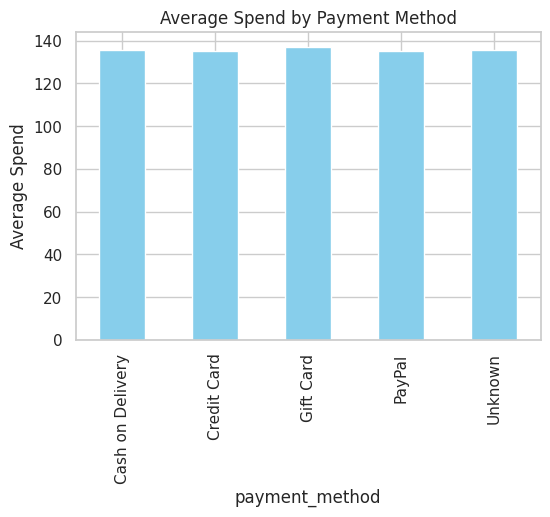

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Higher discounts → higher quantity sold & higher return rates
# Quantity sold vs discount
discount_qty = df.groupby('discount_percent')['quantity'].sum()
discount_return = df.groupby('discount_percent')['is_returned'].mean()

fig, ax1 = plt.subplots(figsize=(8,4))
color = 'tab:blue'
ax1.set_xlabel('Discount %')
ax1.set_ylabel('Quantity Sold', color=color)
ax1.plot(discount_qty.index, discount_qty.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Return Rate', color=color)
ax2.plot(discount_return.index, discount_return.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Discount % vs Quantity Sold & Return Rate")
plt.show()

# 2️⃣ Longer delivery times → lower ratings, higher returns
df.groupby('delivery_days')['review_rating'].mean().plot(kind='line', marker='o', color='purple', figsize=(6,4))
plt.title("Delivery Days vs Avg Review Rating")
plt.ylabel("Average Rating")
plt.show()

df.groupby('delivery_days')['is_returned'].mean().plot(kind='bar', color='orange', figsize=(6,4))
plt.title("Return Rate vs Delivery Days")
plt.ylabel("Return Rate")
plt.show()

# 3️⃣ Age groups → AOV
aov_age = df.groupby('customer_age_group').apply(lambda x: x['final_price'].sum() / x['order_id'].nunique())
aov_age.plot(kind='bar', color='lightgreen', figsize=(6,4))
plt.title("AOV by Age Group")
plt.ylabel("AOV")
plt.show()

# 4️⃣ Region return behavior
region_return = df.groupby('region')['is_returned'].mean().sort_values(ascending=False)
region_return.plot(kind='bar', color='salmon', figsize=(6,4))
plt.title("Return Rate by Region")
plt.ylabel("Return Rate")
plt.show()

# 5️⃣ Device type differences
device_return = df.groupby('device_type')['is_returned'].mean().sort_values(ascending=False)
device_return.plot(kind='bar', color='orange', figsize=(6,4))
plt.title("Return Rate by Device Type")
plt.ylabel("Return Rate")
plt.show()

df.groupby('device_type')['final_price'].mean().plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Average Spend by Device Type")
plt.ylabel("Average Spend")
plt.show()

# 6️⃣ Premium brand return rates (example: Nike)
brand_return = df.groupby('brand')['is_returned'].mean().sort_values()
print(brand_return.head(10))  # Look for Nike or other premium brands

# 7️⃣ Low review ratings predictive of returns
rating_return = df.groupby('review_rating')['is_returned'].mean()
rating_return.plot(kind='bar', color='purple', figsize=(6,4))
plt.title("Return Rate by Review Rating")
plt.ylabel("Return Rate")
plt.show()

# 8️⃣ Payment method differences
df.groupby('payment_method')['is_returned'].mean().plot(kind='bar', color='salmon', figsize=(6,4))
plt.title("Return Rate by Payment Method")
plt.ylabel("Return Rate")
plt.show()

df.groupby('payment_method')['final_price'].mean().plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Average Spend by Payment Method")
plt.ylabel("Average Spend")
plt.show()

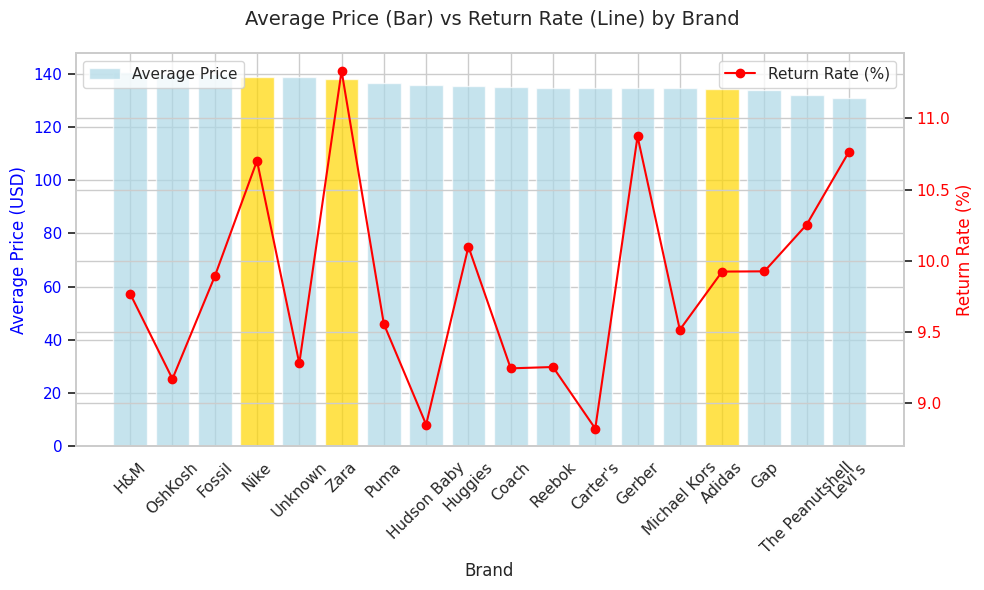

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate average price and return rate per brand
brand_stats = df.groupby('brand').agg(
    avg_price=('final_price', 'mean'),
    return_rate=('is_returned', 'mean')
).reset_index()

brand_stats['return_rate'] *= 100  # convert to percentage

# Sort brands by average price (optional for clearer view)
brand_stats = brand_stats.sort_values('avg_price', ascending=False)

# Mark premium brands (example: Nike, Adidas - change as needed)
premium_brands = ['Nike', 'Adidas', 'Zara']
brand_stats['is_premium'] = brand_stats['brand'].isin(premium_brands)

# Create figure
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Average Price
bars = ax1.bar(brand_stats['brand'], brand_stats['avg_price'],
               color=['gold' if p else 'lightblue' for p in brand_stats['is_premium']],
               alpha=0.7, label='Average Price')

ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create second axis for Return Rate
ax2 = ax1.twinx()
ax2.plot(brand_stats['brand'], brand_stats['return_rate'], color='red', marker='o', label='Return Rate (%)')
ax2.set_ylabel('Return Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle("Average Price (Bar) vs Return Rate (Line) by Brand", fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


From the chart, we see that:
Zara has the highest return rate among all brands.
Carter’s has the lowest return rate.
Premium brands such as Nike, Adidas, and Zara generally have higher average prices compared to others, but their return rates vary.

# **Section E**

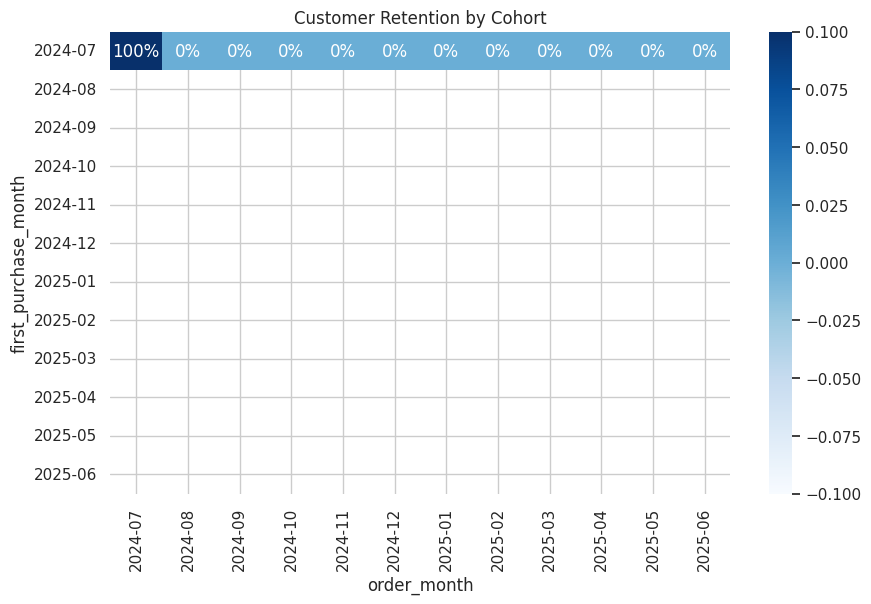

In [ ]:
df['first_purchase_month'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')
df['order_month'] = df['order_date'].dt.to_period('M')

cohort_pivot = (
    df.groupby(['first_purchase_month', 'order_month'])['customer_id']
      .nunique()
      .unstack(fill_value=0)
)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention by Cohort")
plt.show()

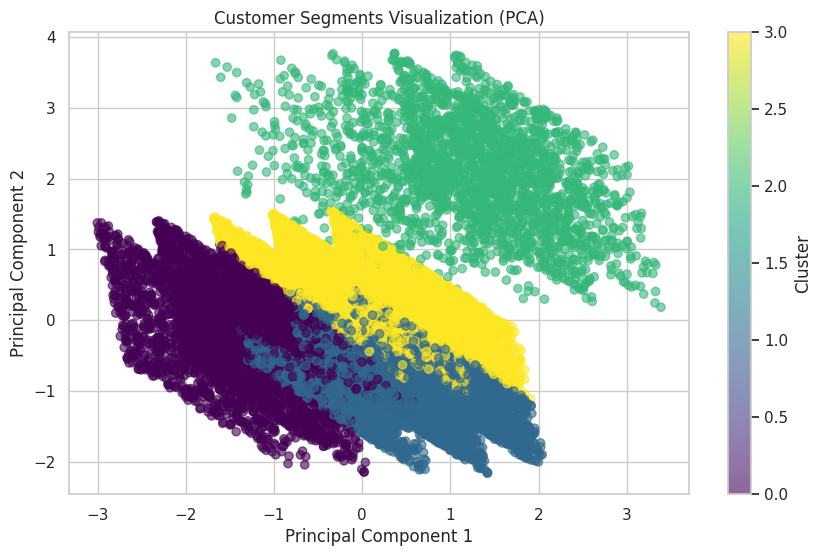

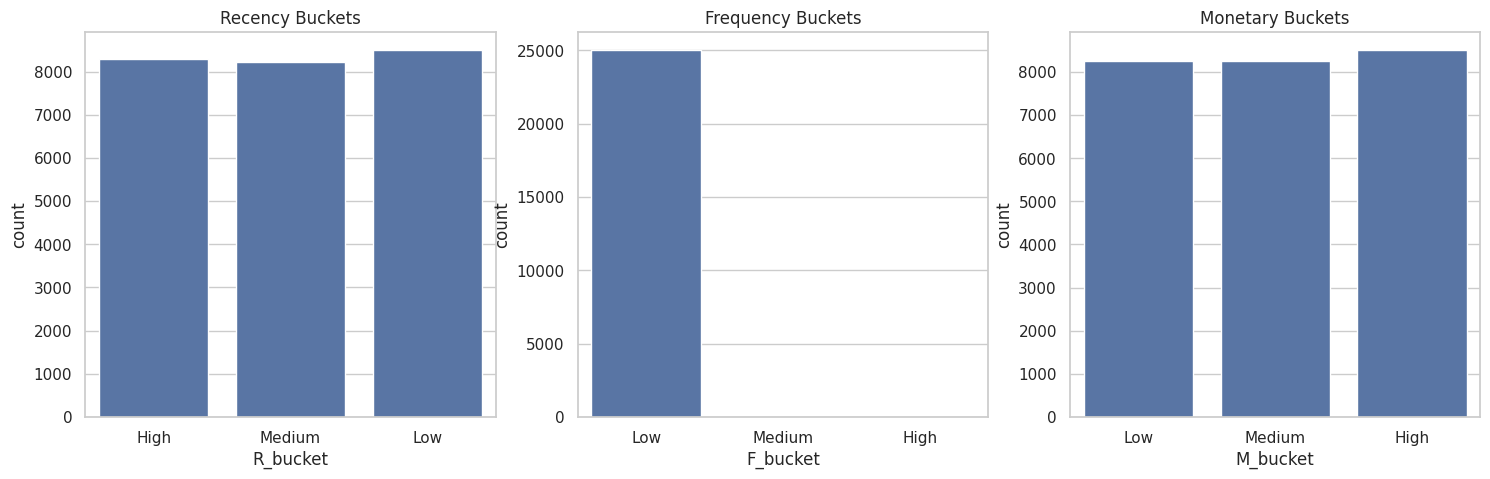

Cluster Profiles (mean values):
            recency  frequency    monetary  is_returned  review_rating
cluster                                                               
0        183.430875        1.0  128.512600          0.0       2.170682
1         85.521552        1.0  139.279227          0.0       4.170907
2        183.057294        1.0  135.526855          1.0       3.724502
3        278.970947        1.0  137.300066          0.0       4.179124


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# RFM + behavior metrics
now = df['order_date'].max()
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (now - x.max()).days,
    'order_id': 'nunique',
    'final_price': 'sum',
    'is_returned': 'mean',
    'review_rating': 'mean'
}).rename(columns={'order_date': 'recency', 'order_id': 'frequency', 'final_price': 'monetary'})

# Scale the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# PCA for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(10,6))
scatter = plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# RFM Buckets using quantiles
def r_bucket(x):
    if x <= rfm['recency'].quantile(0.33):
        return 'High'      # Low recency = recent = good
    elif x <= rfm['recency'].quantile(0.66):
        return 'Medium'
    else:
        return 'Low'

def f_bucket(x):
    if x <= rfm['frequency'].quantile(0.33):
        return 'Low'
    elif x <= rfm['frequency'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

def m_bucket(x):
    if x <= rfm['monetary'].quantile(0.33):
        return 'Low'
    elif x <= rfm['monetary'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

rfm['R_bucket'] = rfm['recency'].apply(r_bucket)
rfm['F_bucket'] = rfm['frequency'].apply(f_bucket)
rfm['M_bucket'] = rfm['monetary'].apply(m_bucket)
rfm['RFM_Segment'] = rfm['R_bucket'].str[0] + rfm['F_bucket'].str[0] + rfm['M_bucket'].str[0]

#RFM buckets counts
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='R_bucket', data=rfm, order=['High','Medium','Low'])
plt.title('Recency Buckets')

plt.subplot(1,3,2)
sns.countplot(x='F_bucket', data=rfm, order=['Low','Medium','High'])
plt.title('Frequency Buckets')

plt.subplot(1,3,3)
sns.countplot(x='M_bucket', data=rfm, order=['Low','Medium','High'])
plt.title('Monetary Buckets')

plt.show()

print("Cluster Profiles (mean values):")
print(rfm.groupby('cluster')[['recency','frequency','monetary','is_returned','review_rating']].mean())

Price Elasticity of Demand: -0.03


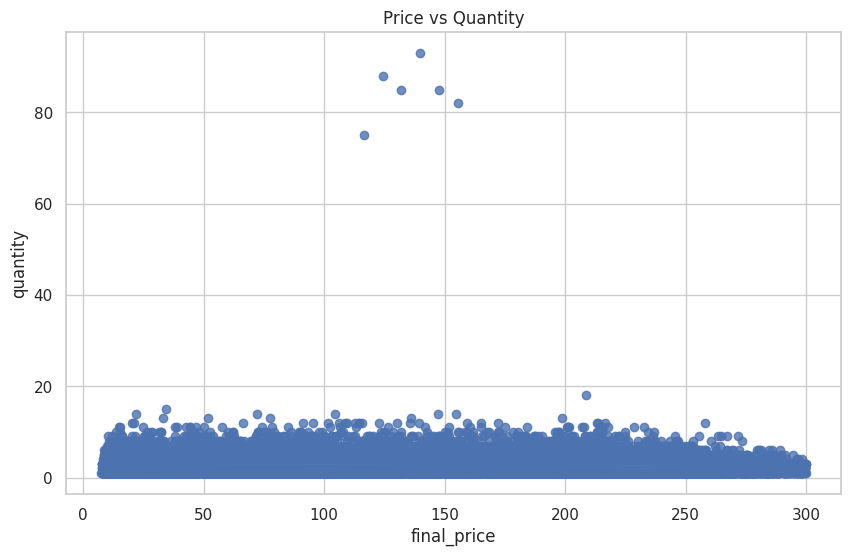

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

pe_data = df.groupby('final_price').agg({'quantity':'sum'}).reset_index()
pe_data['log_price'] = np.log(pe_data['final_price'])
pe_data['log_quantity'] = np.log(pe_data['quantity'])

model = LinearRegression()
model.fit(pe_data[['log_price']], pe_data['log_quantity'])
elasticity = model.coef_[0]
print(f"Price Elasticity of Demand: {elasticity:.2f}")

sns.regplot(x='final_price', y='quantity', data=pe_data)
plt.title("Price vs Quantity")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest

In [ ]:
features = ['final_price', 'quantity', 'discount_percent', 'review_rating', 'delivery_days']
X = df[features]
y = df['is_returned']

X = X.fillna(0)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
print("Logistic Regression Feature Importance:")
print(pd.Series(log_reg.coef_[0], index=features))

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X, y)
print("\nDecision Tree Feature Importance:")
print(pd.Series(tree.feature_importances_, index=features))

Logistic Regression Feature Importance:
final_price        -0.000100
quantity           -0.044412
discount_percent   -0.001001
review_rating       0.024673
delivery_days      -0.001343
dtype: float64

Decision Tree Feature Importance:
final_price         0.633290
quantity            0.202042
discount_percent    0.050806
review_rating       0.032014
delivery_days       0.081849
dtype: float64


In [ ]:
anomaly_features = df[['final_price', 'quantity', 'discount_percent', 'is_returned']]
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(anomaly_features)
suspicious = df[df['anomaly'] == -1]
print(f"Suspicious Orders Found: {len(suspicious)}")

Suspicious Orders Found: 247


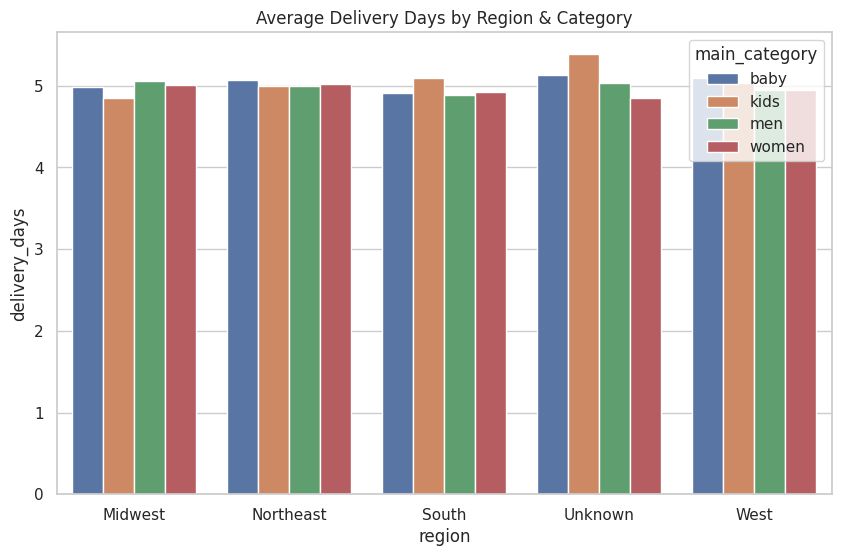

In [ ]:
delay_data = df.groupby(['region', 'main_category'])['delivery_days'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=delay_data, x='region', y='delivery_days', hue='main_category')
plt.title("Average Delivery Days by Region & Category")
plt.show()